In [56]:
import pandas as pd
import missingno as msno
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
from catboost import CatBoostClassifier, Pool

In [81]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [57]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

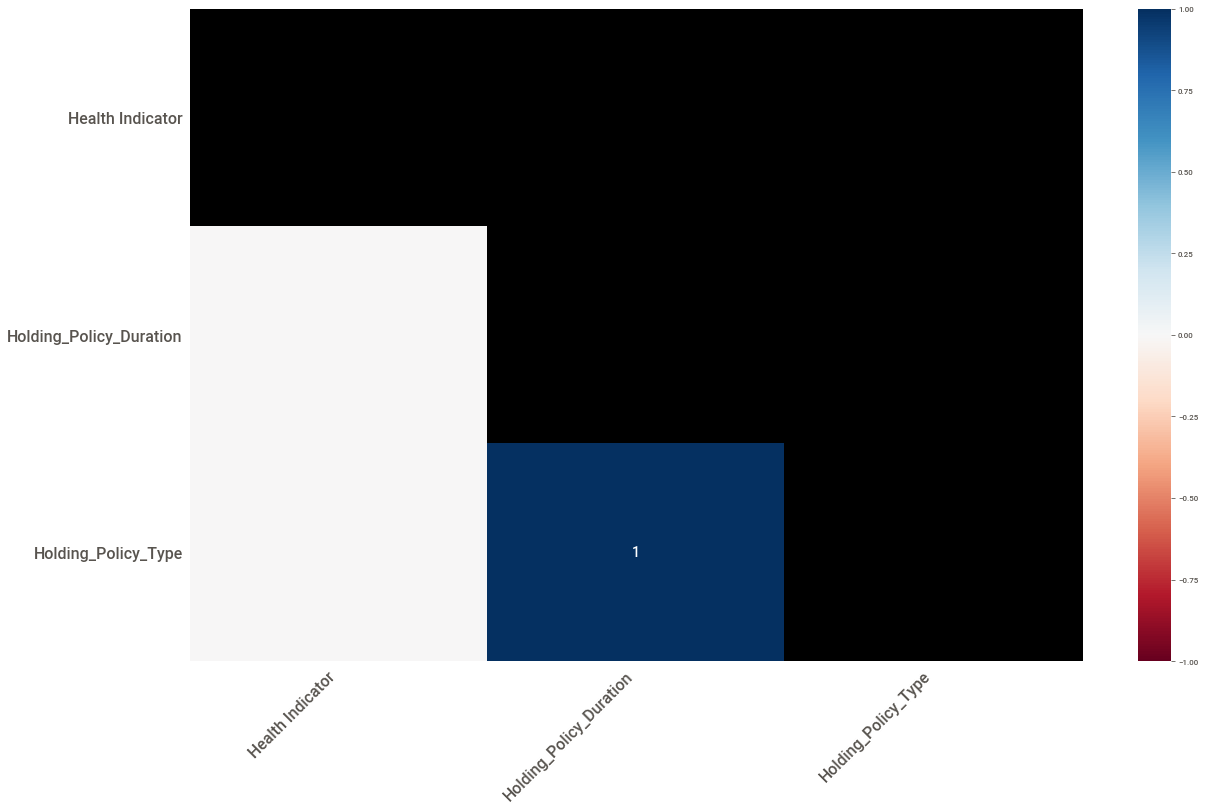

In [58]:
msno.heatmap(train)

In [59]:
from pandas_profiling import ProfileReport
design_report = ProfileReport(train,title='Pandas Profiling Report', explorative=True)
design_report.to_widgets()

In [60]:
import sweetviz as sv
sweet_report = sv.analyze(train)



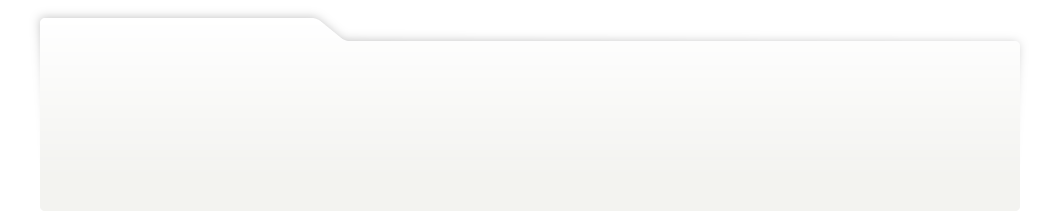
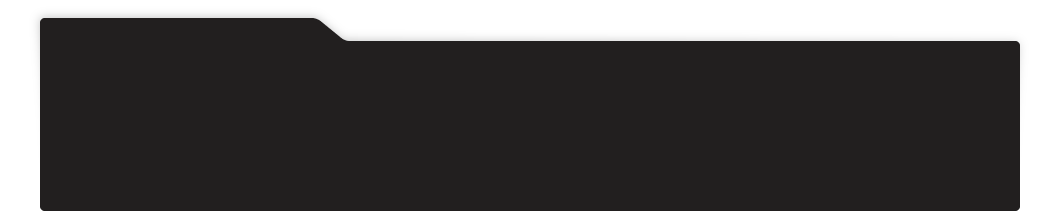
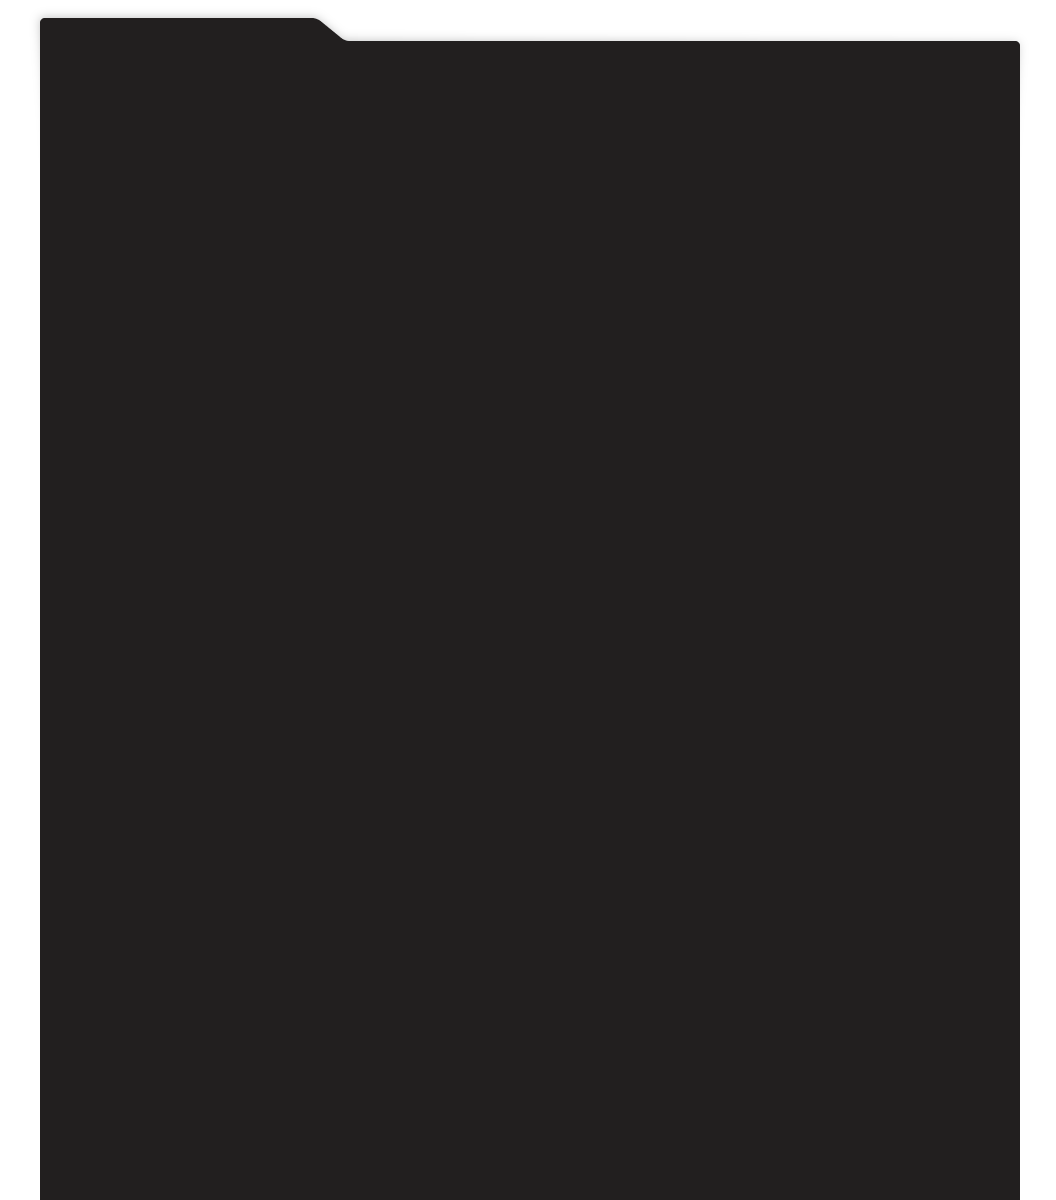
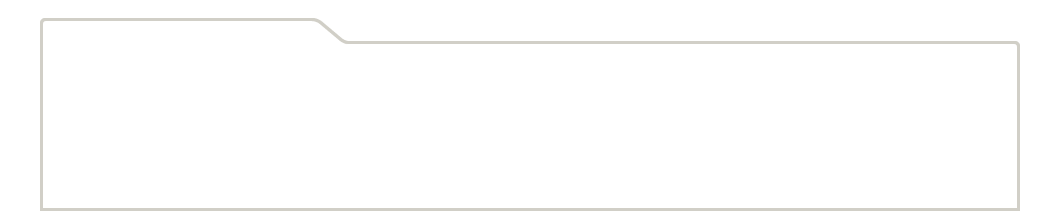
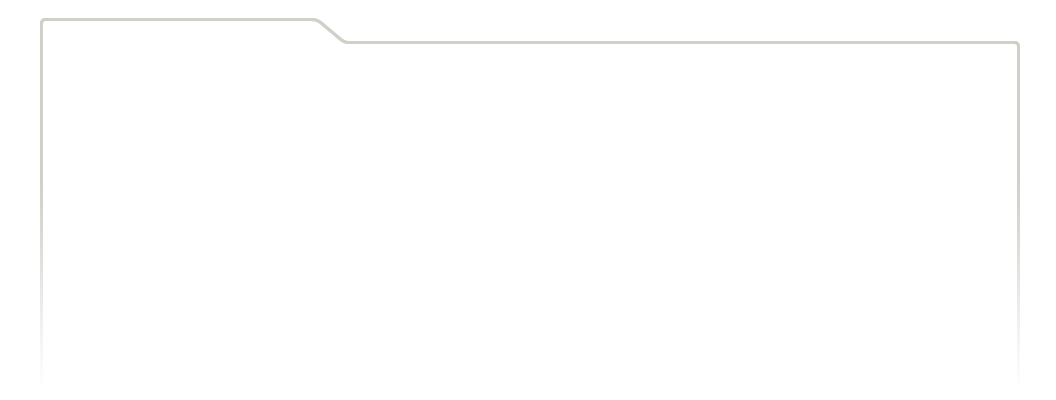
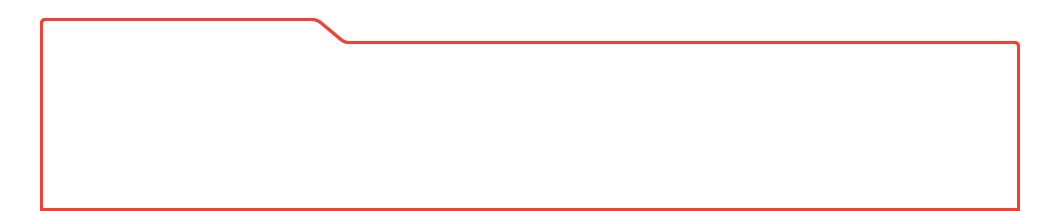
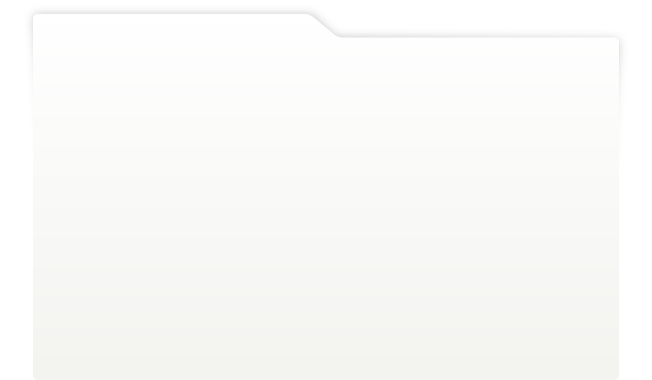
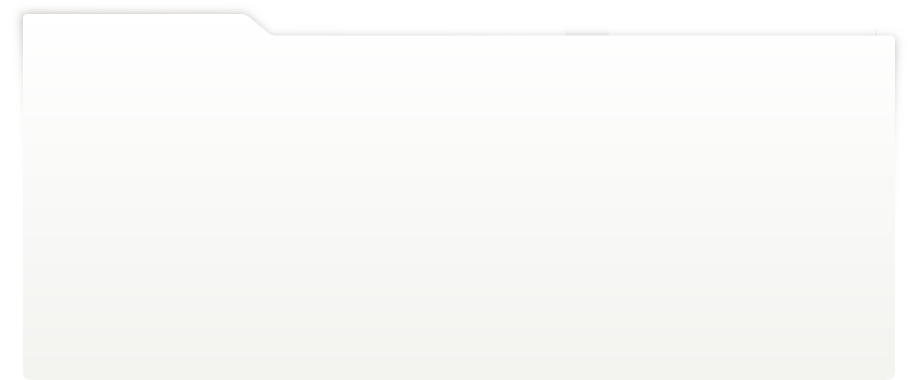
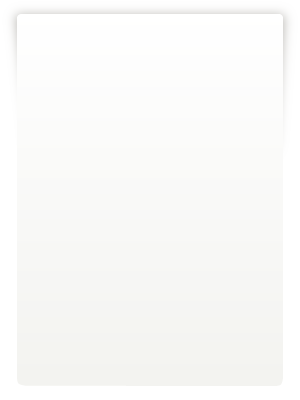
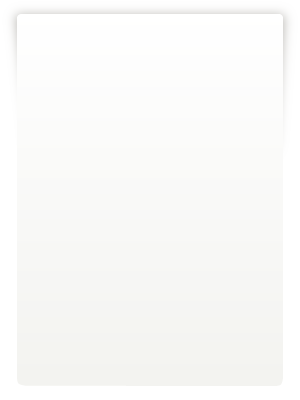
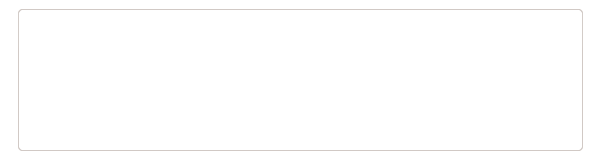
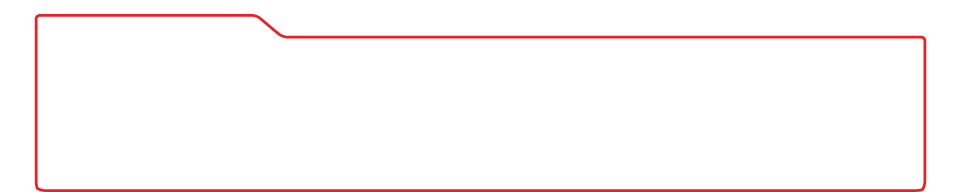
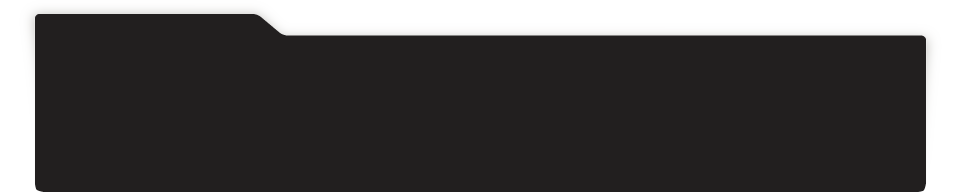
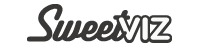
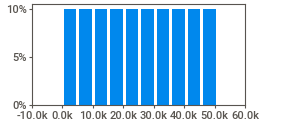
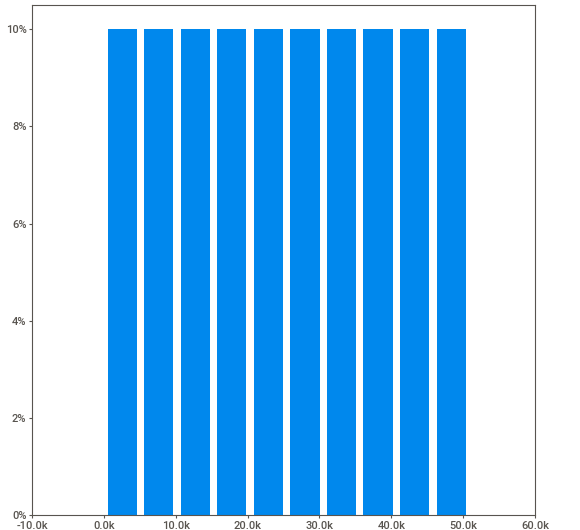
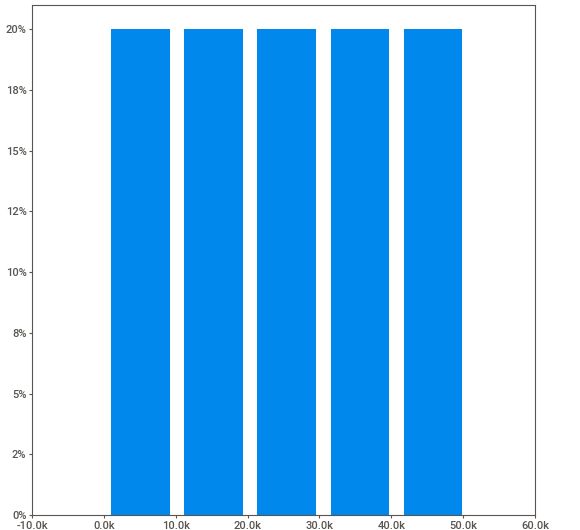
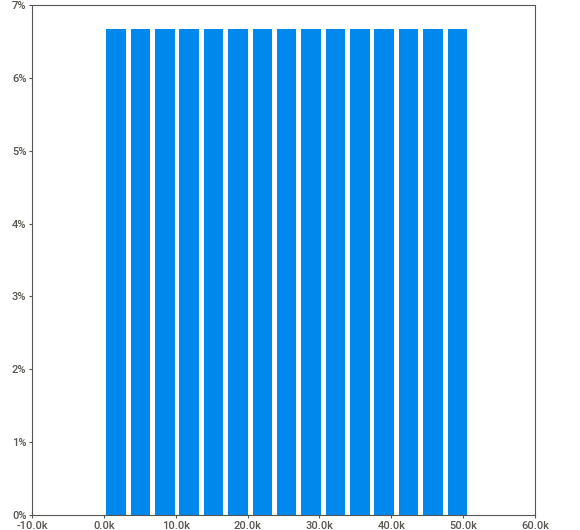
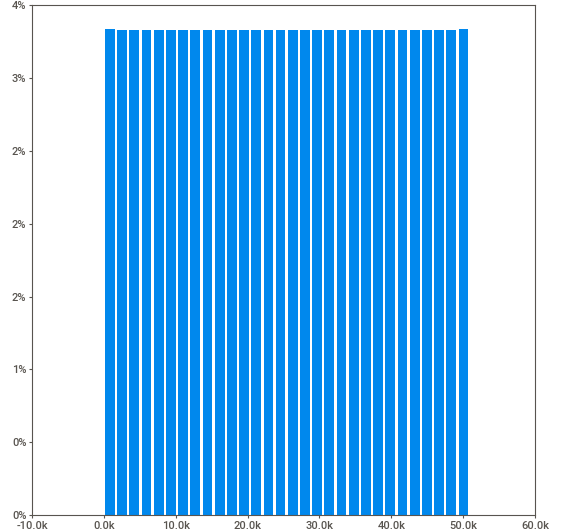
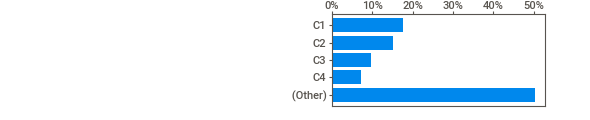
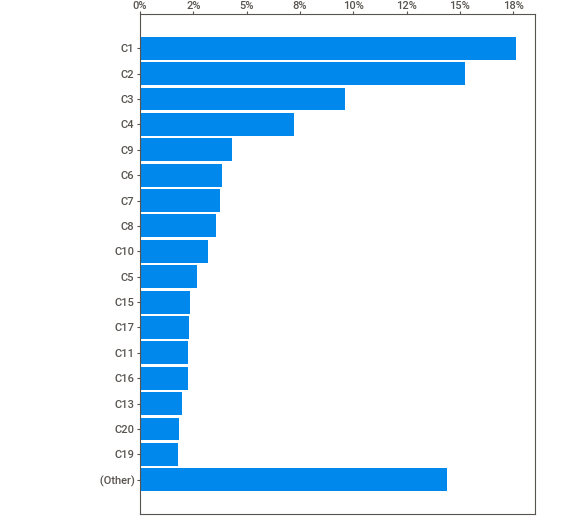
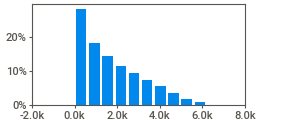
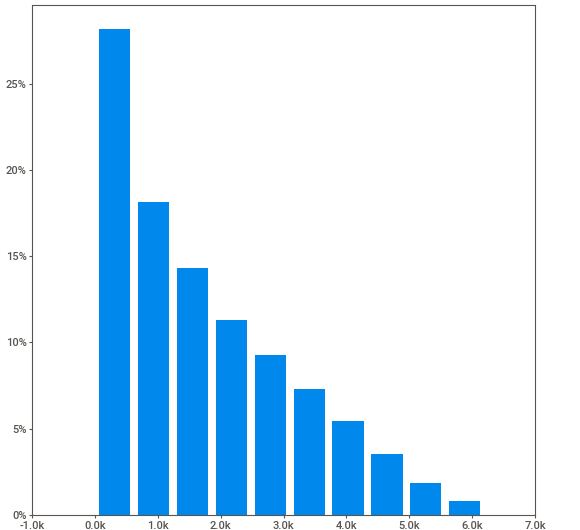
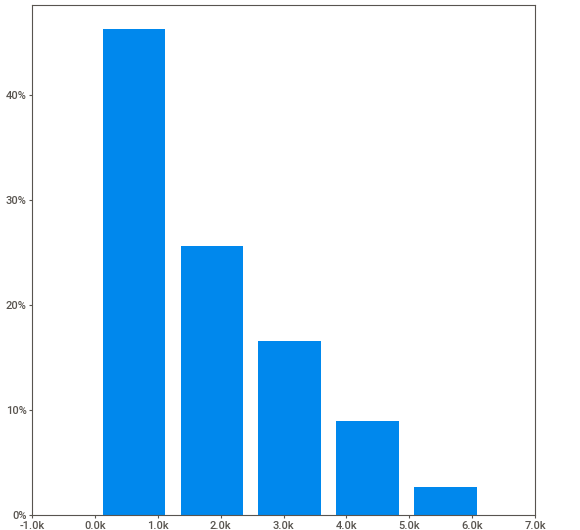
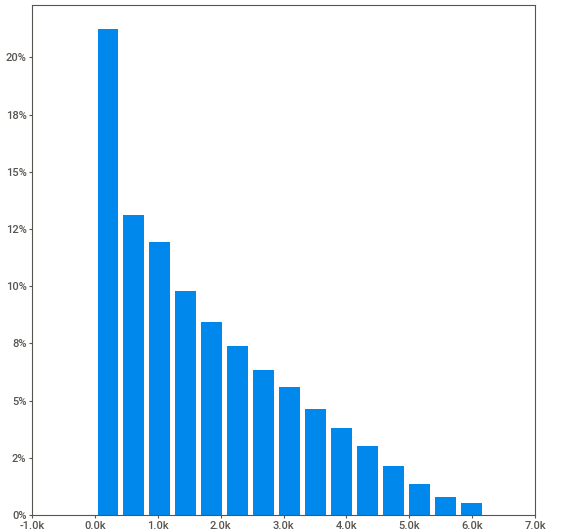
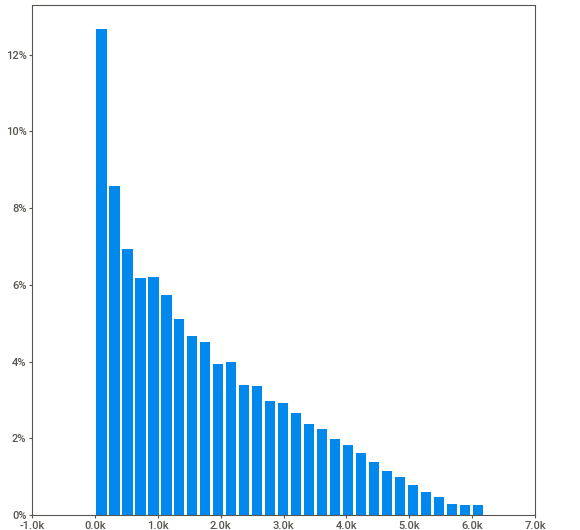
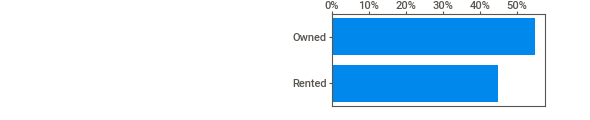
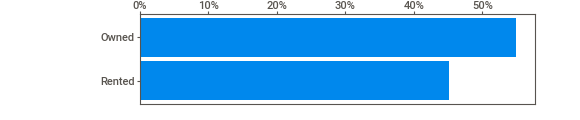
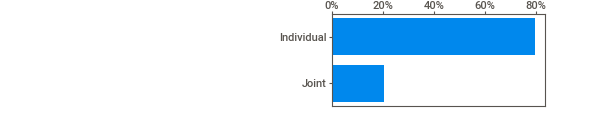
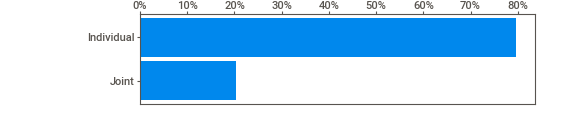
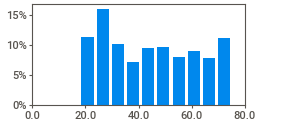
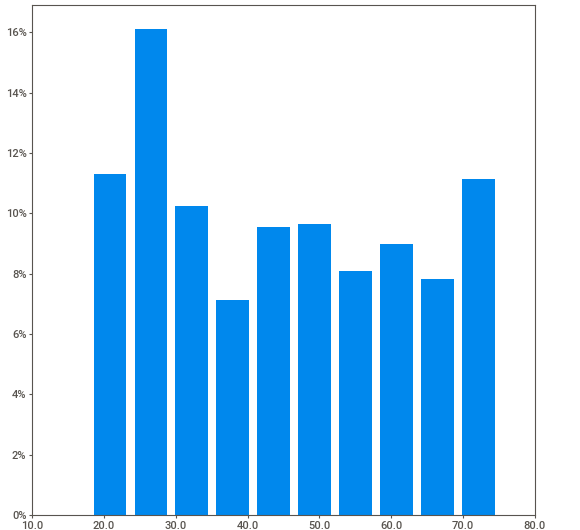
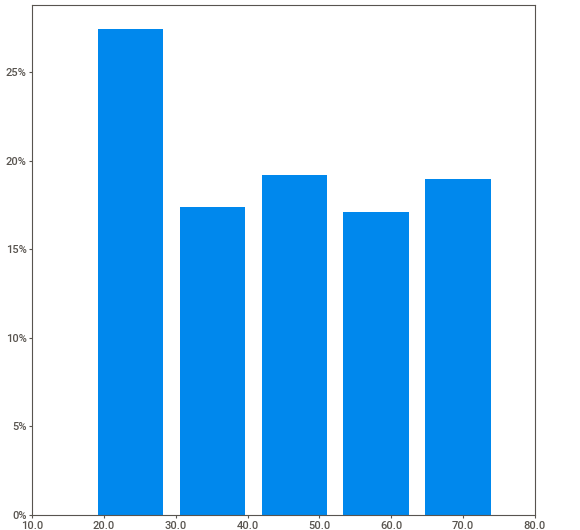
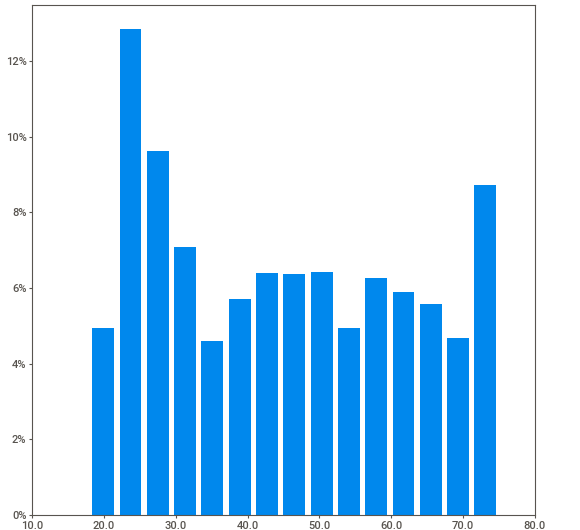
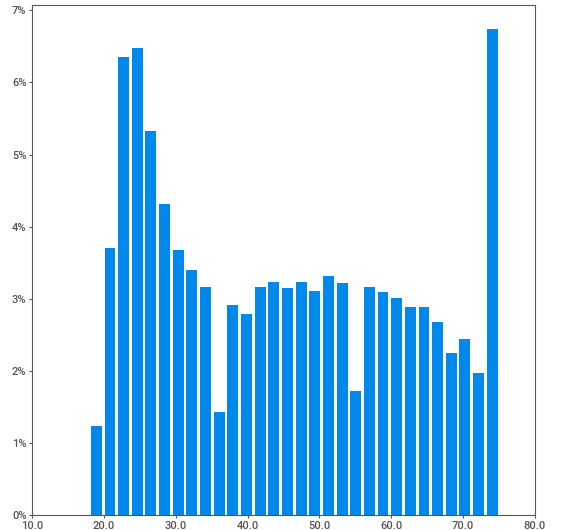
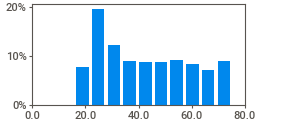
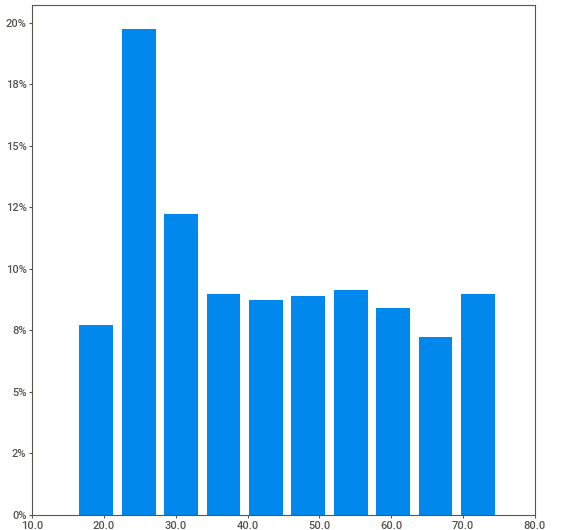
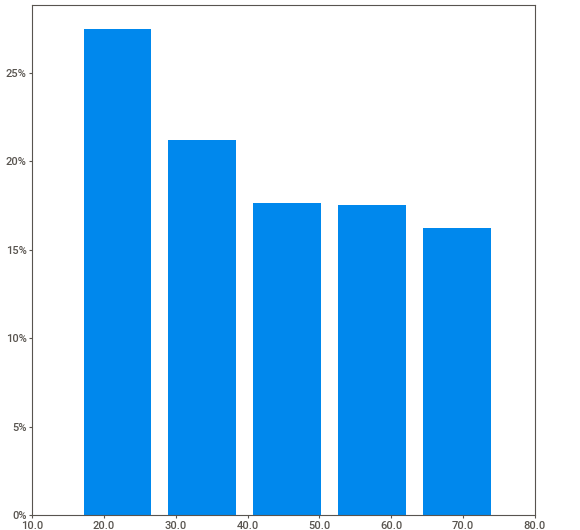
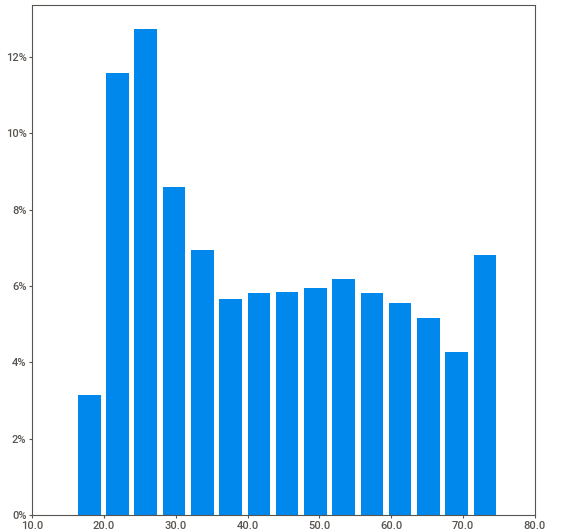
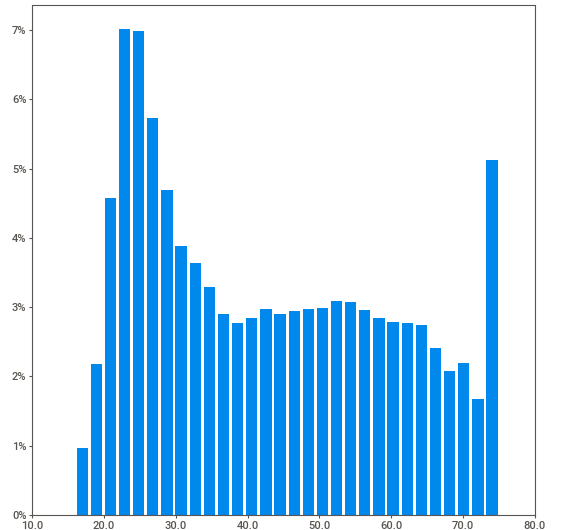
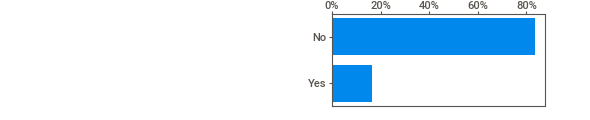
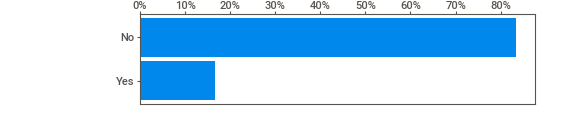
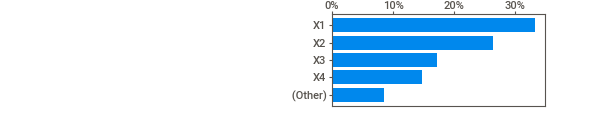
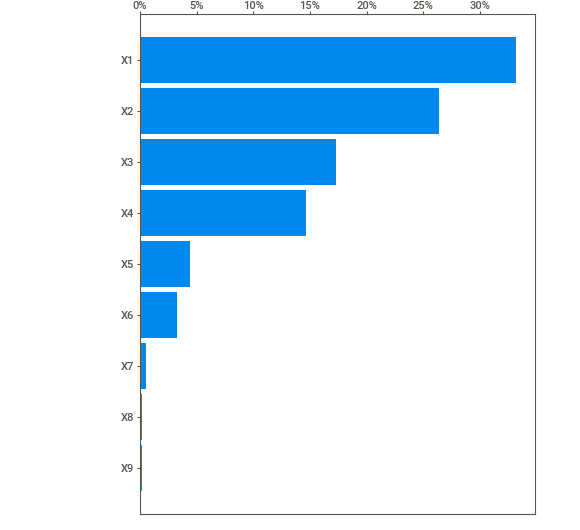
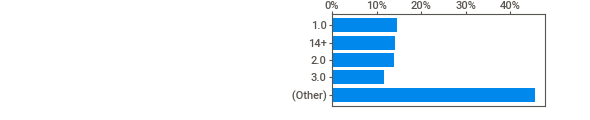
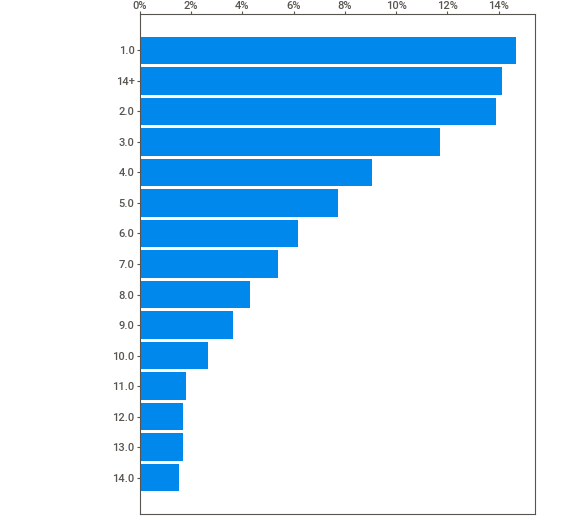
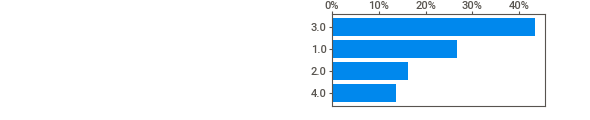
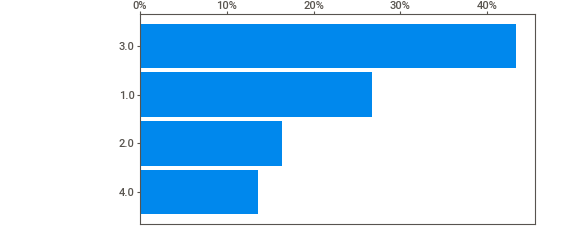
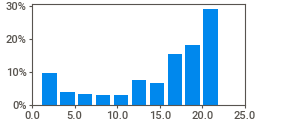
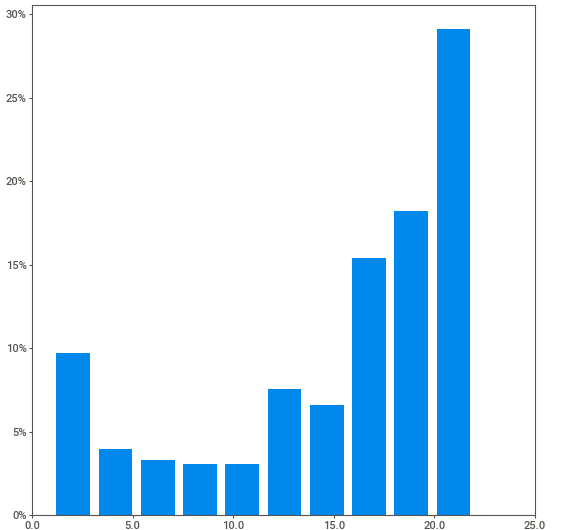
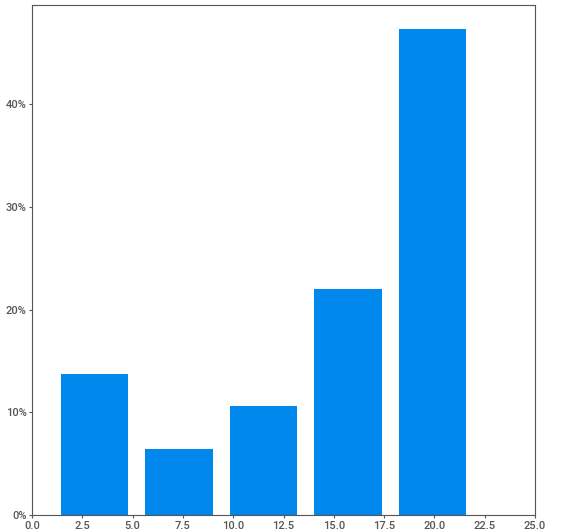
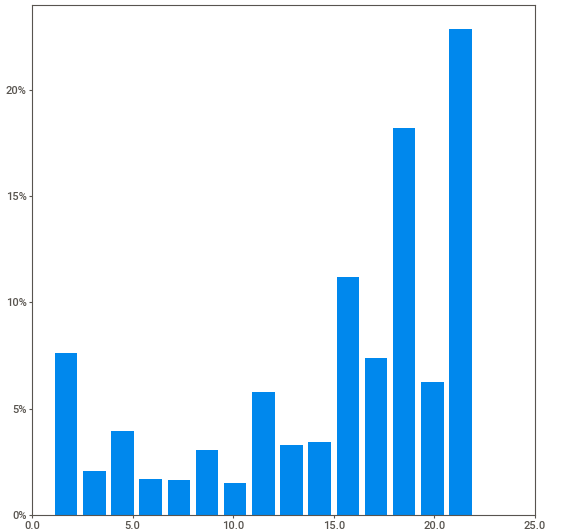
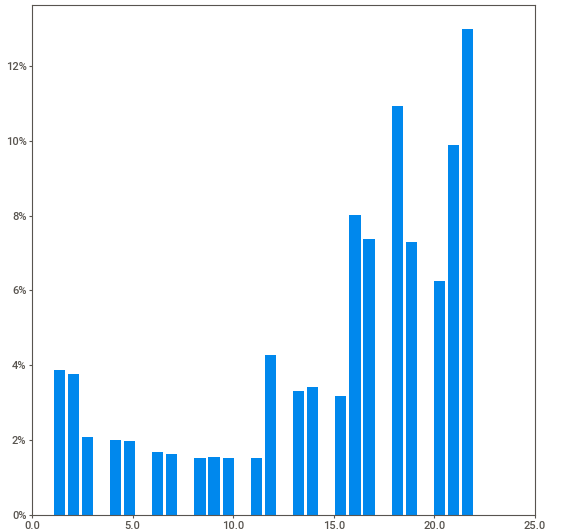
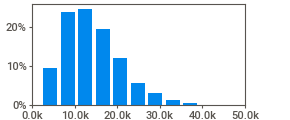
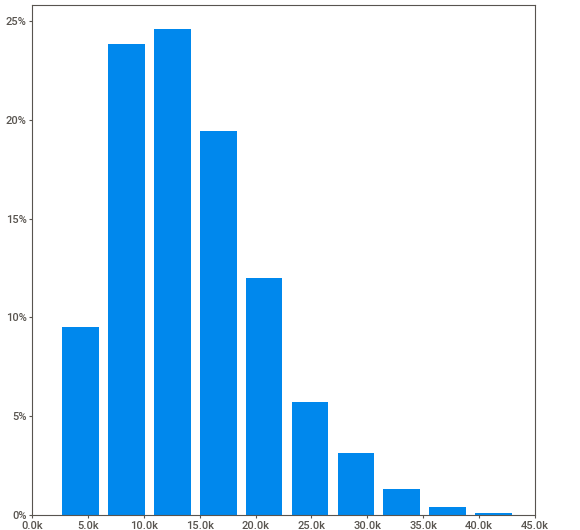
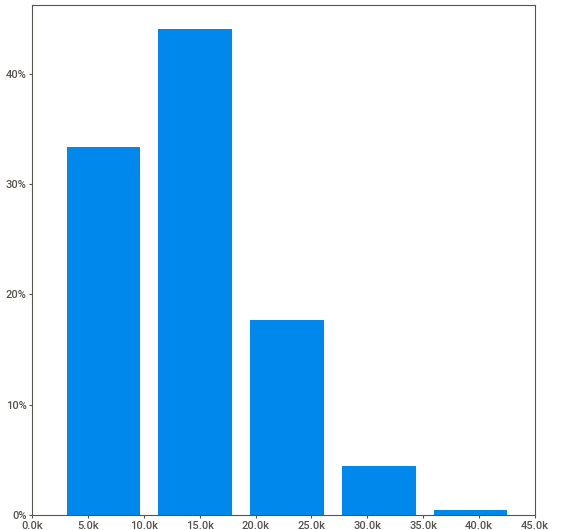
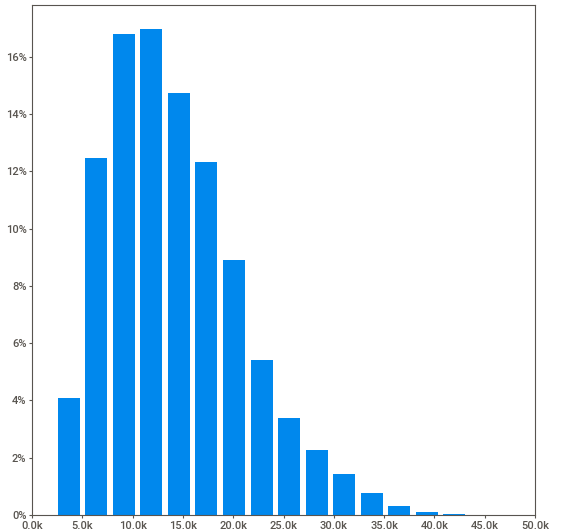
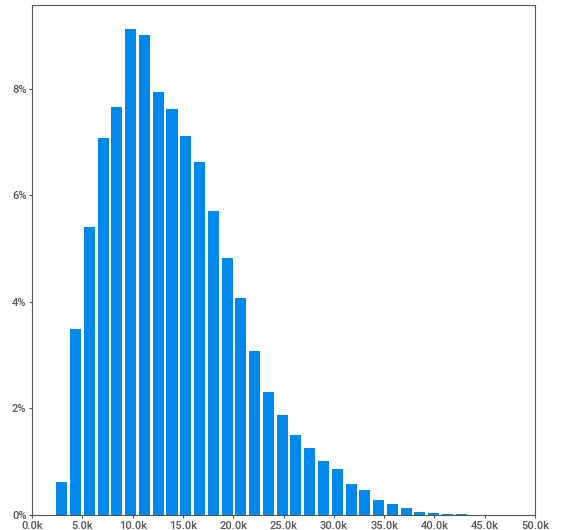
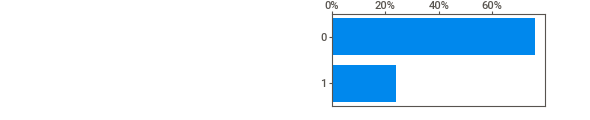
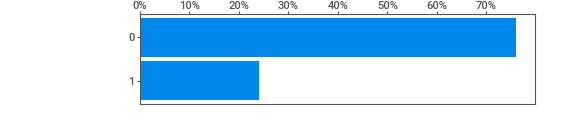
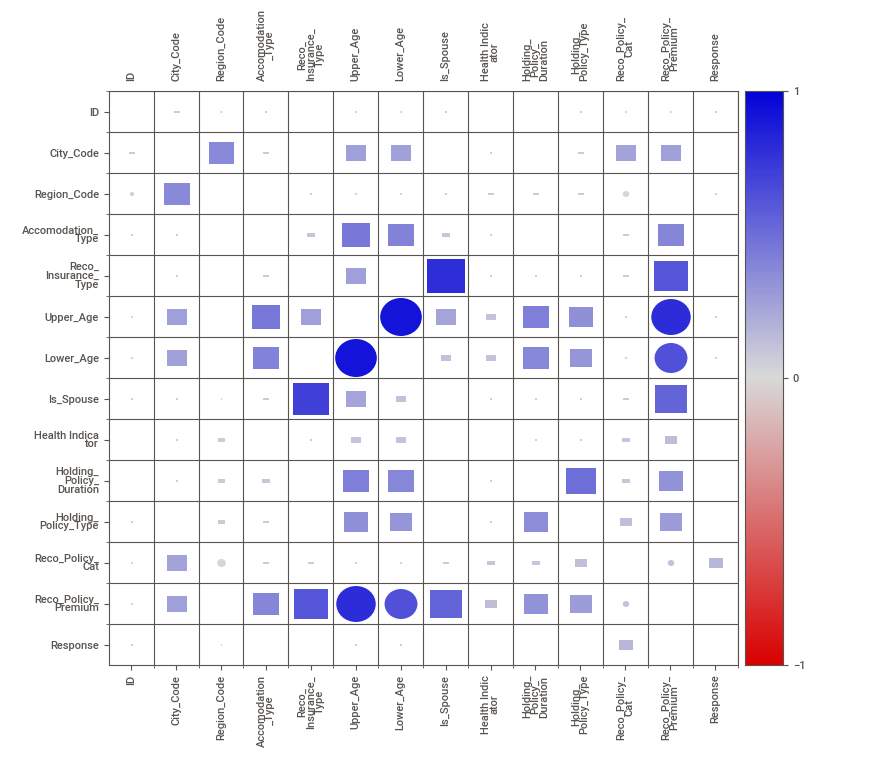
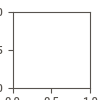

In [61]:
sweet_report.show_notebook()


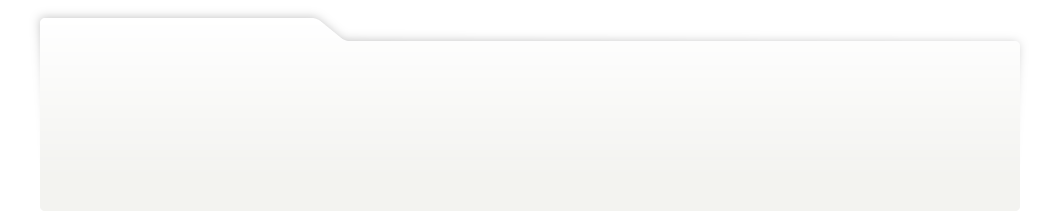
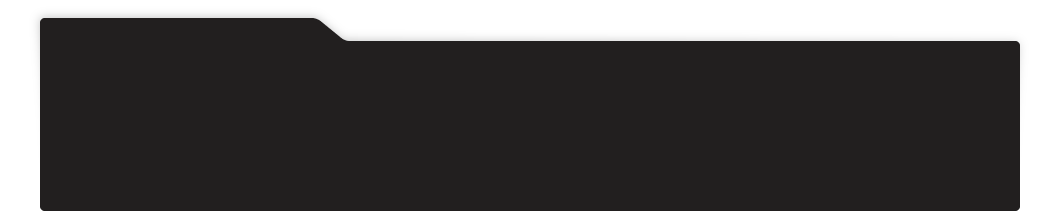
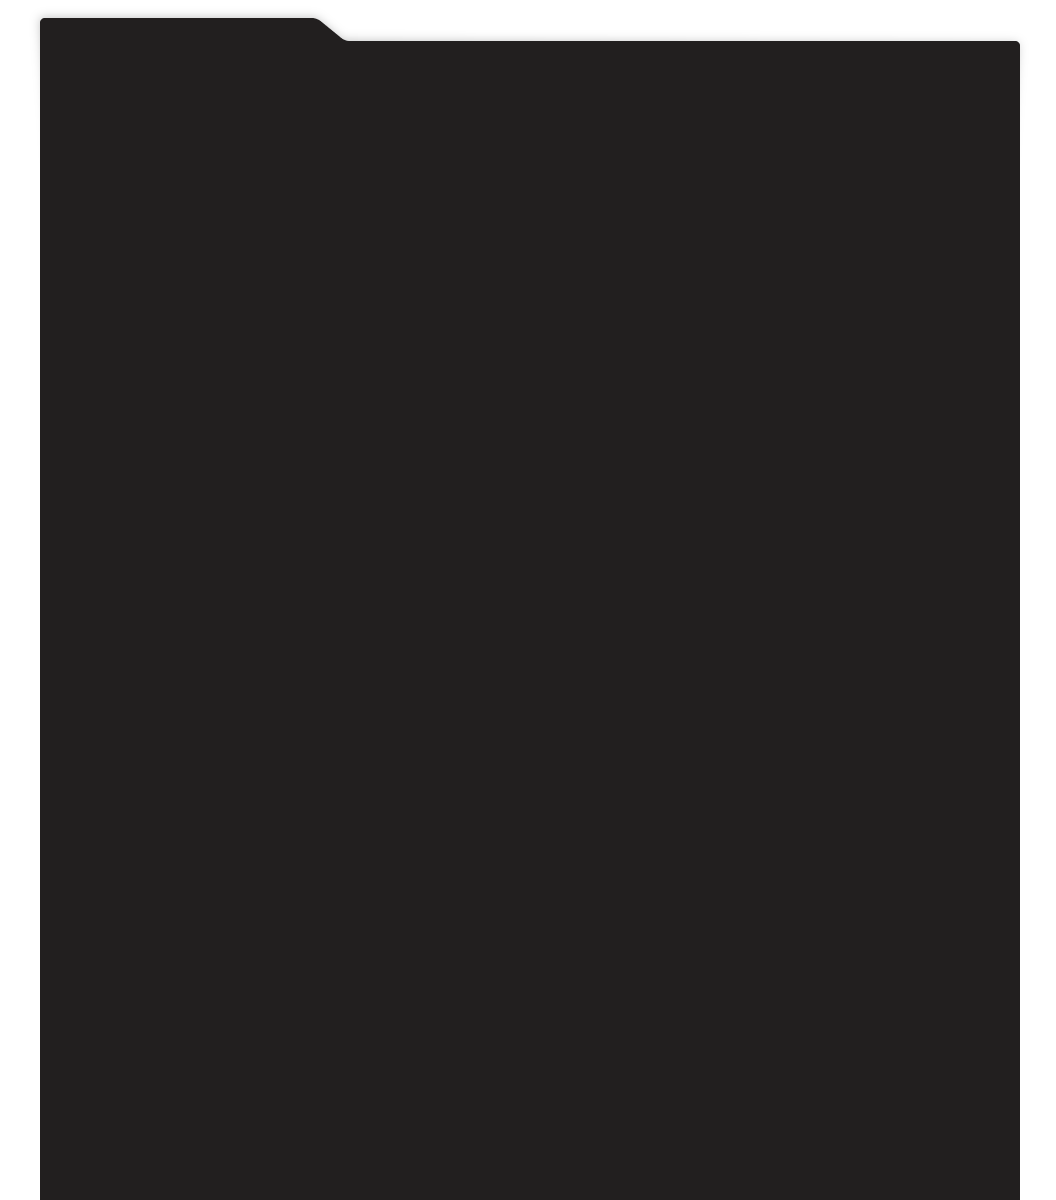
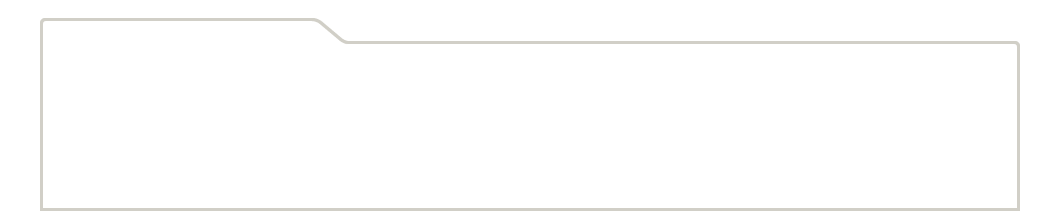
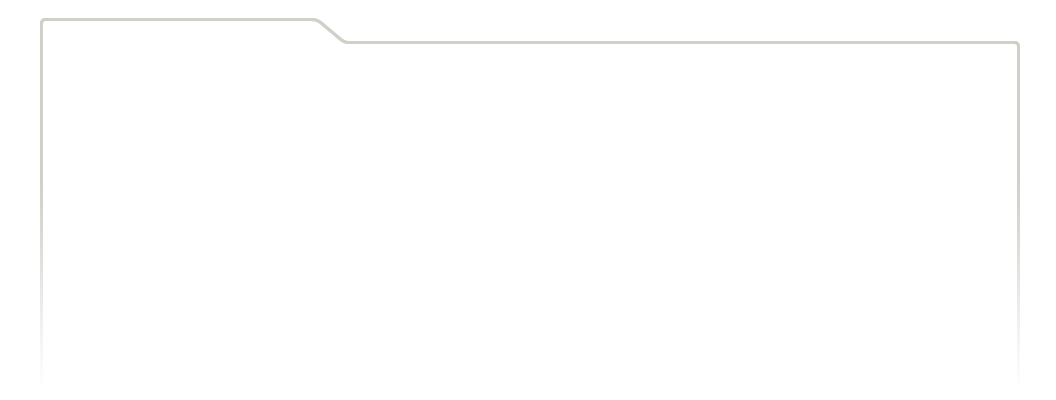
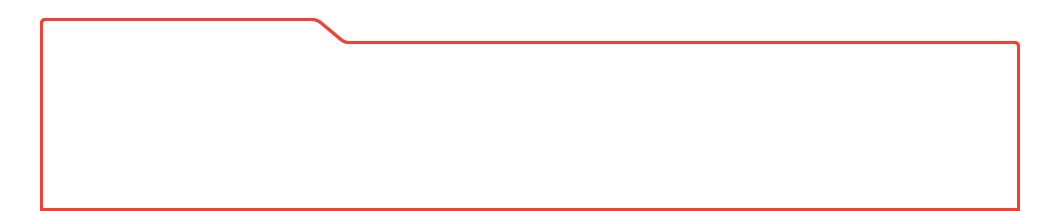
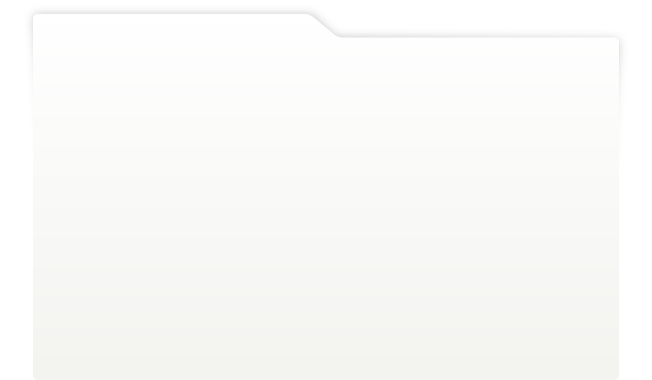
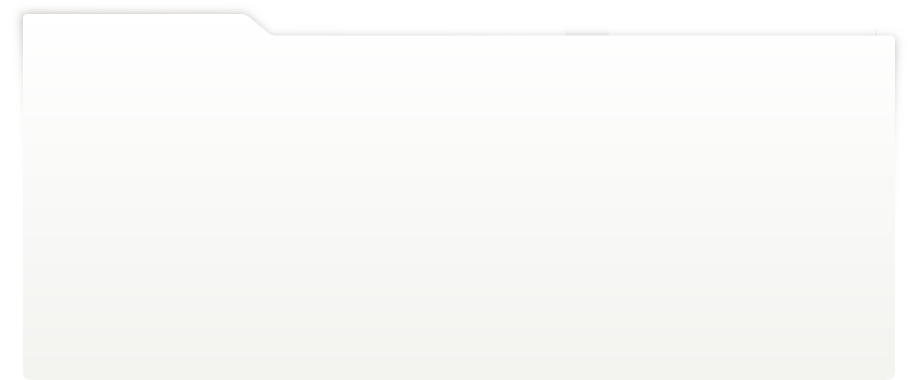
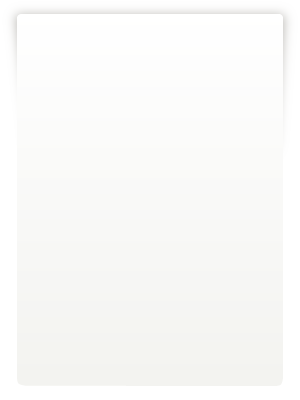
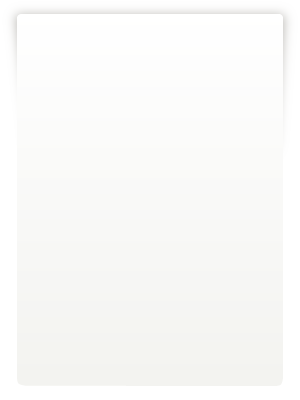
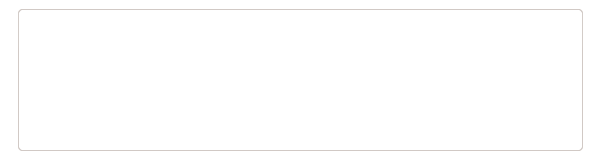
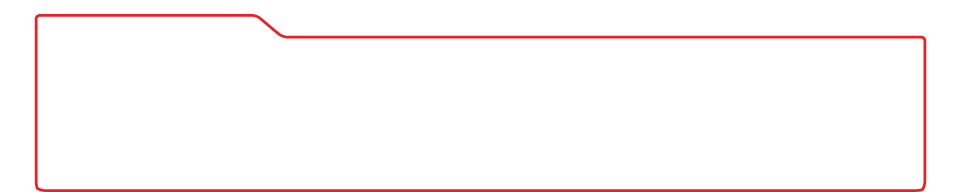
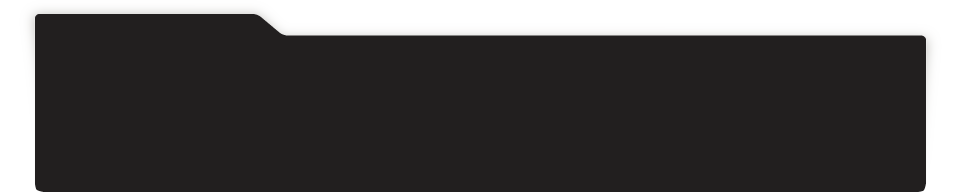
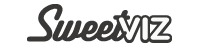
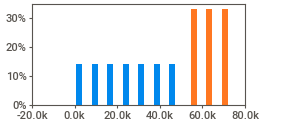
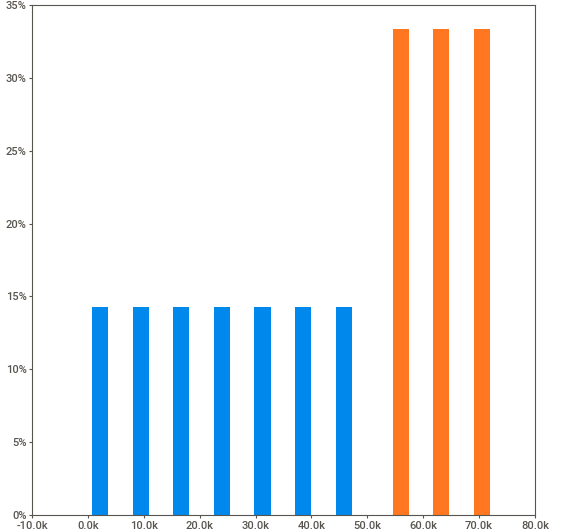
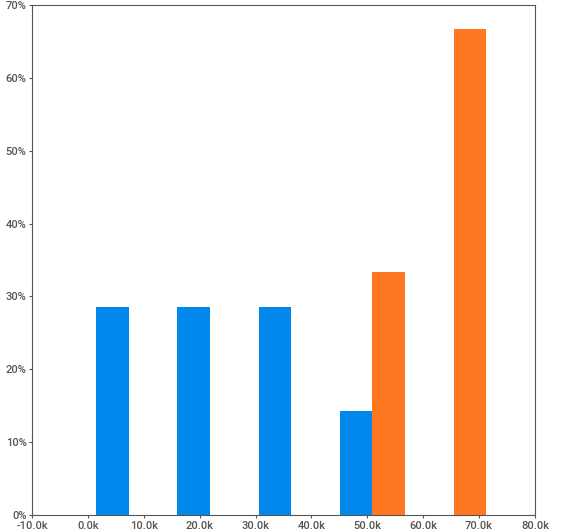
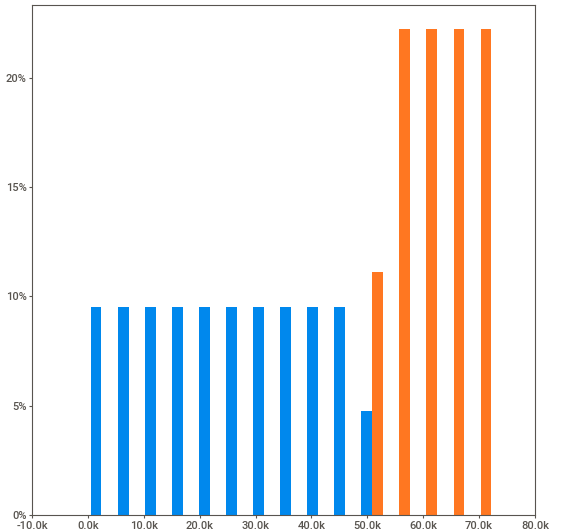
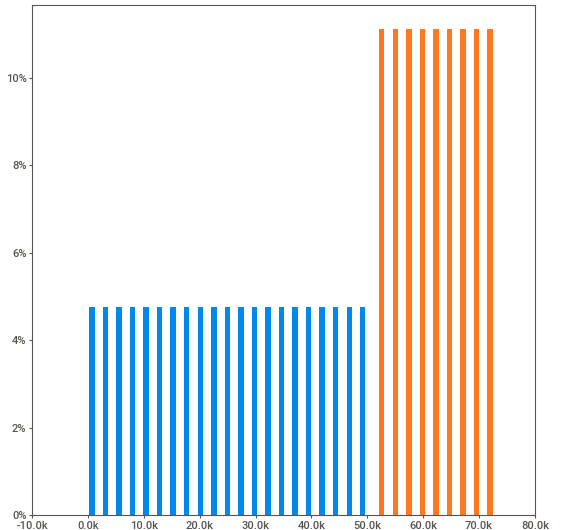
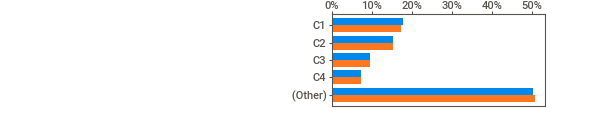
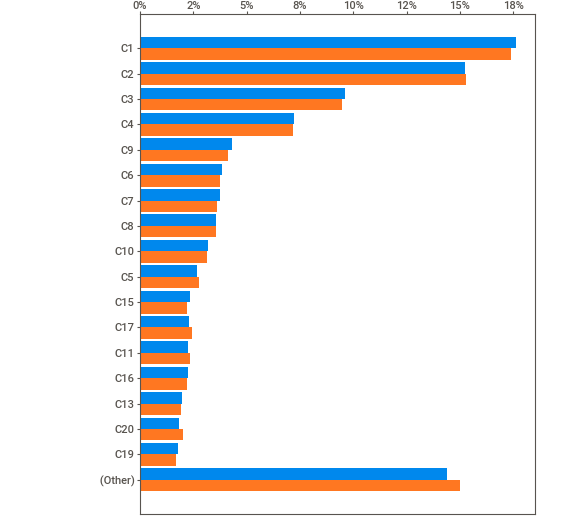
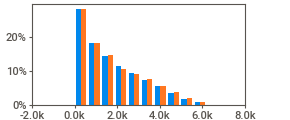
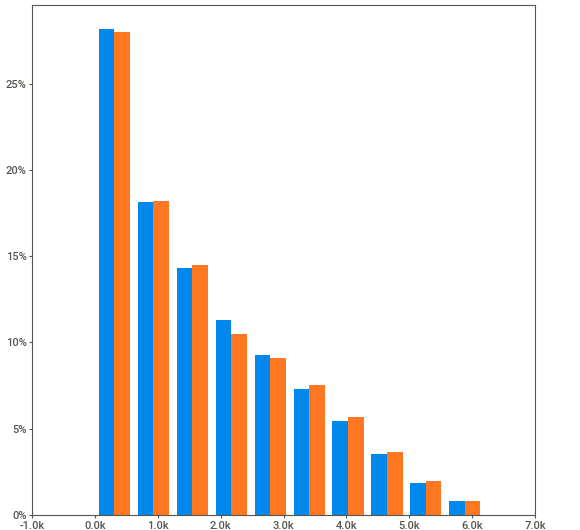
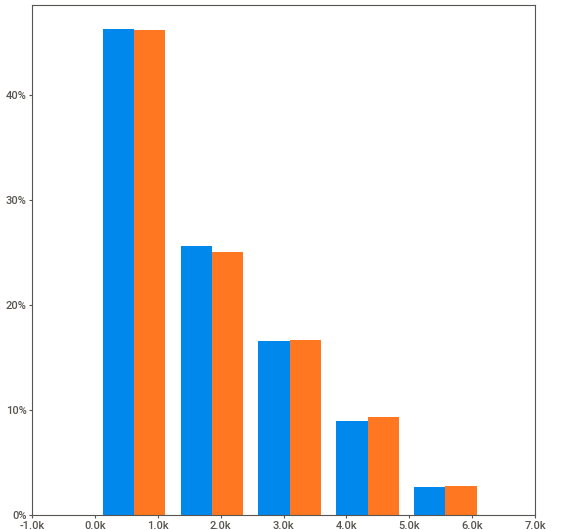
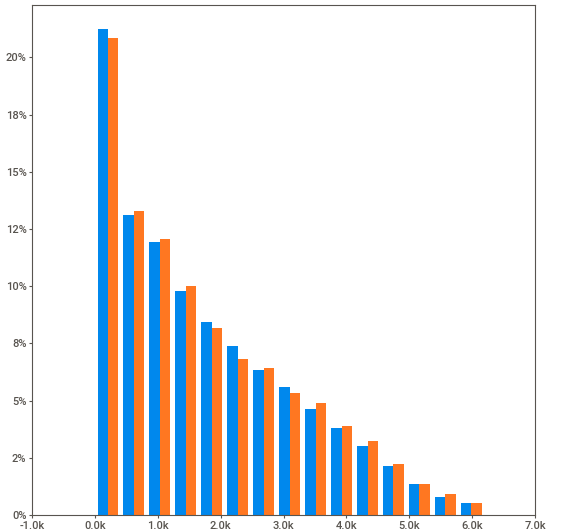
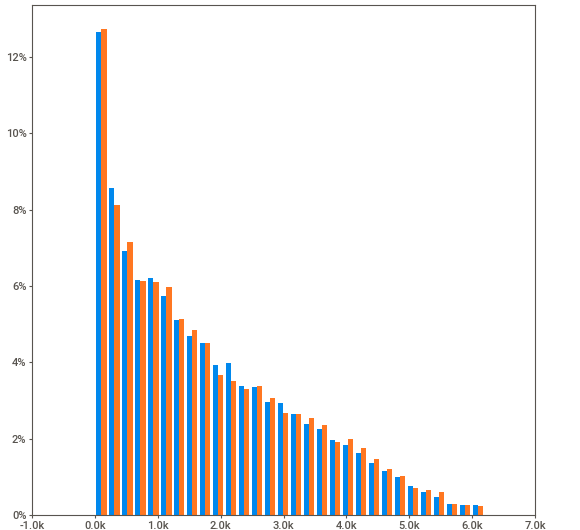
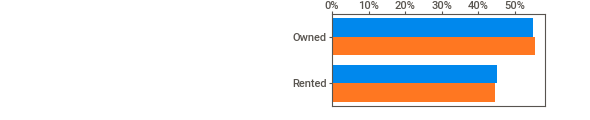
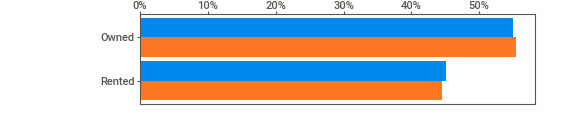
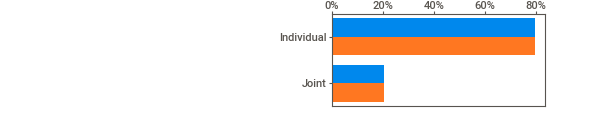
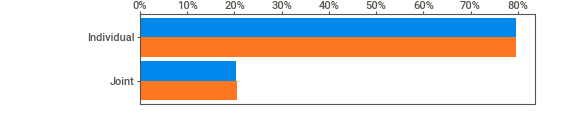
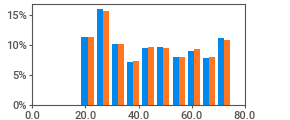
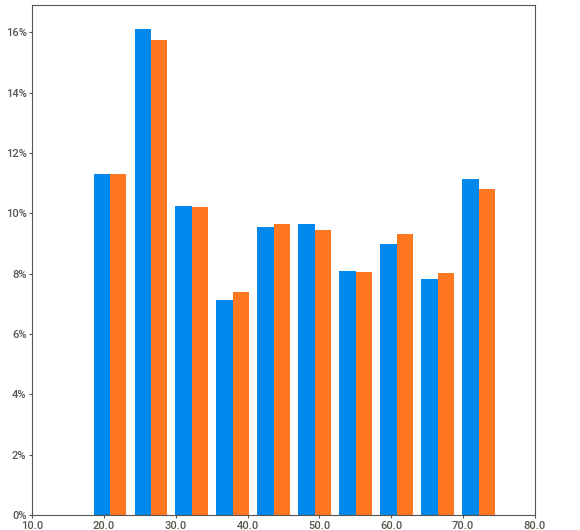
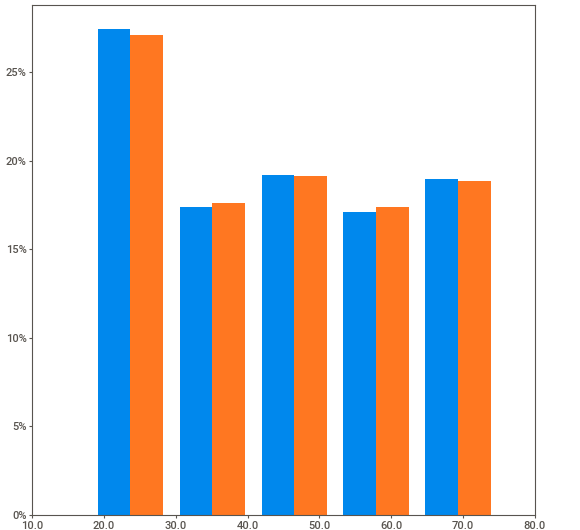
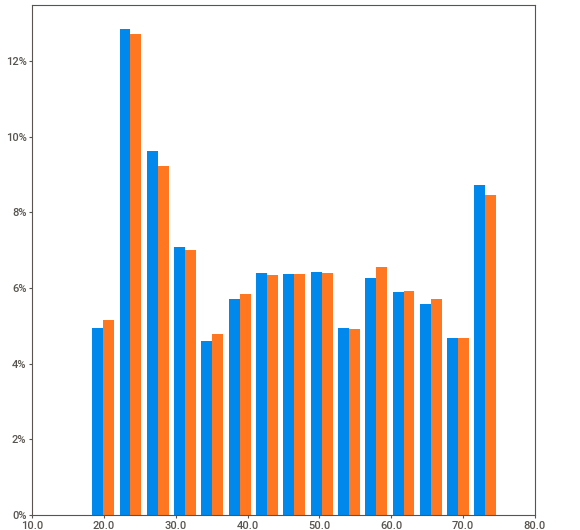
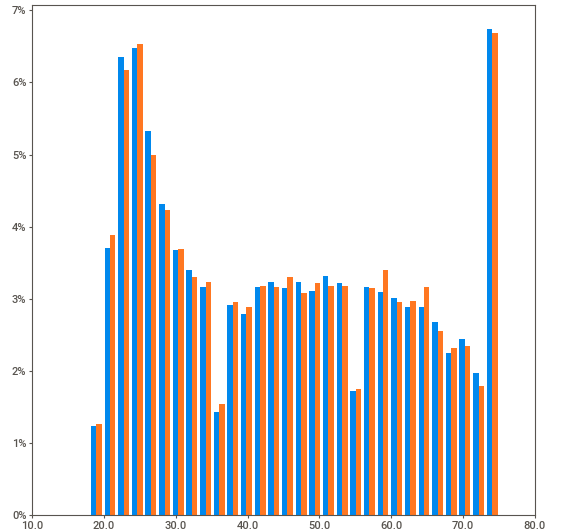
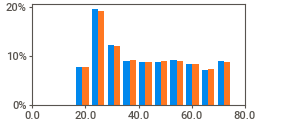
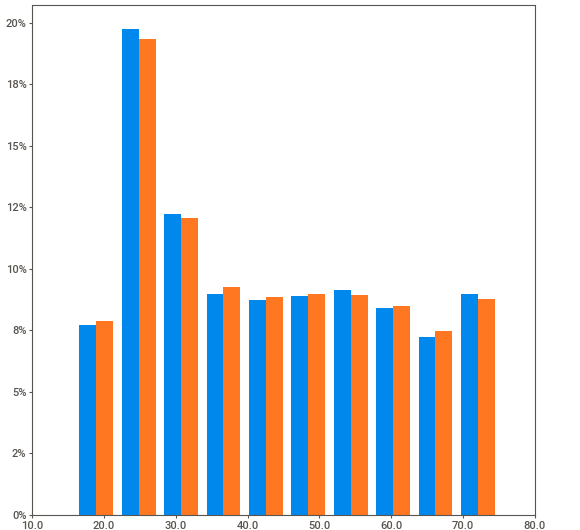
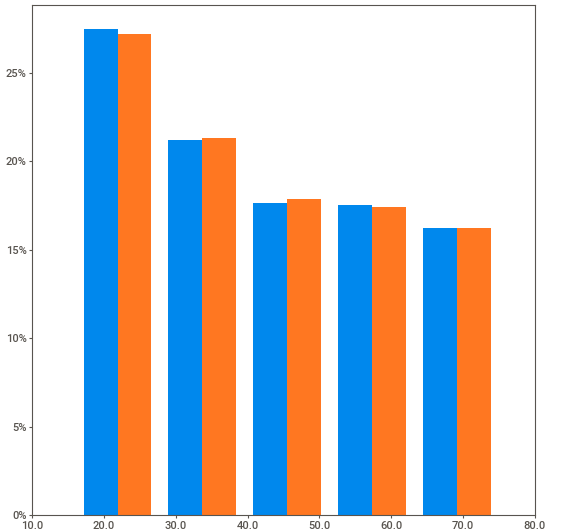
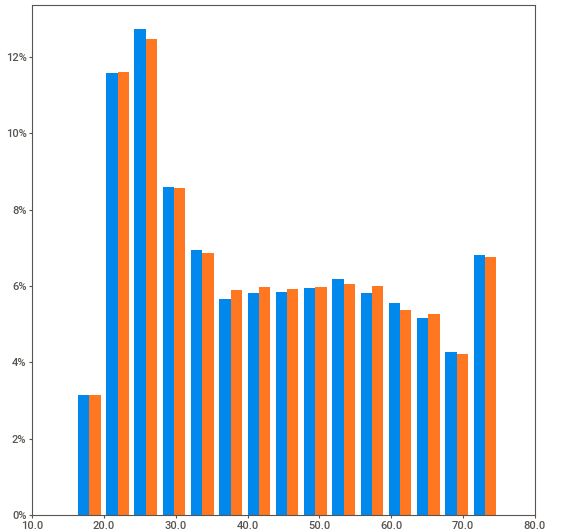
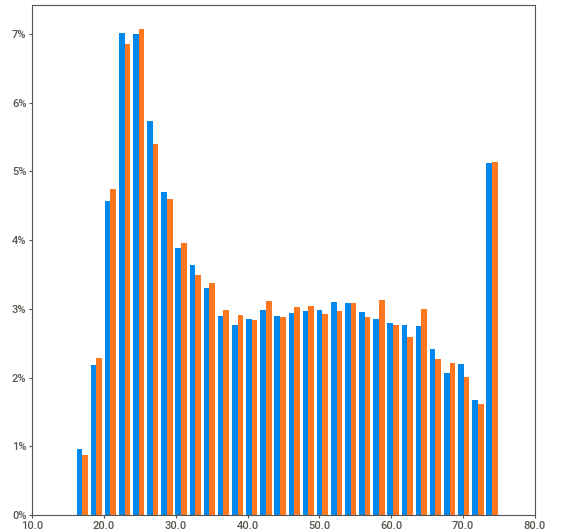
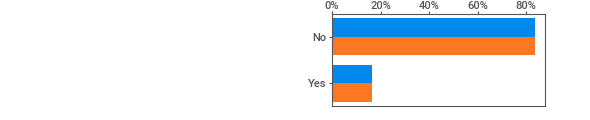
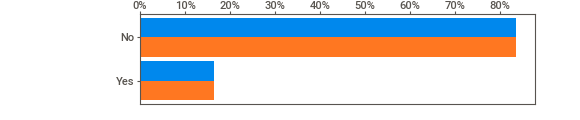
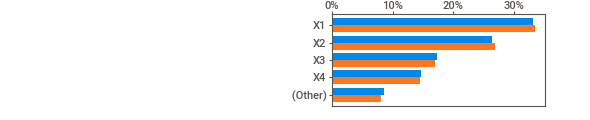
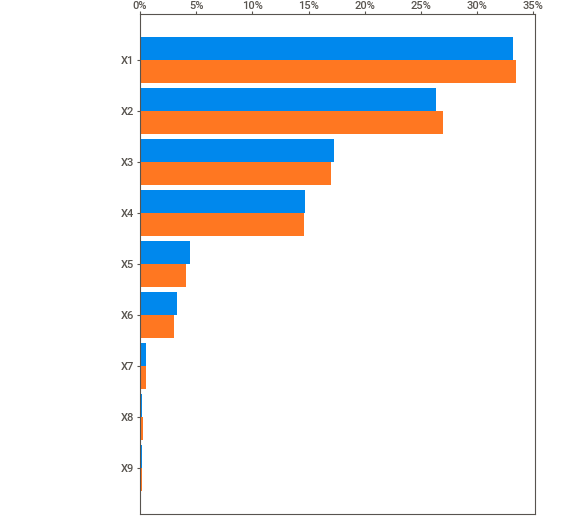
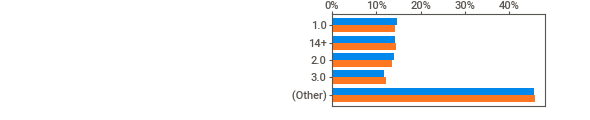
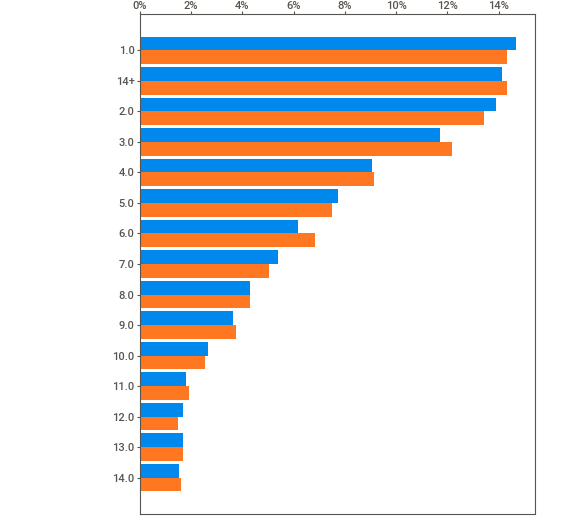
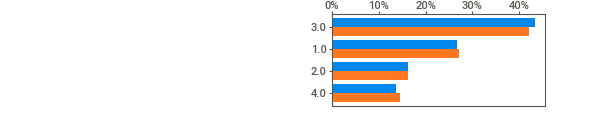
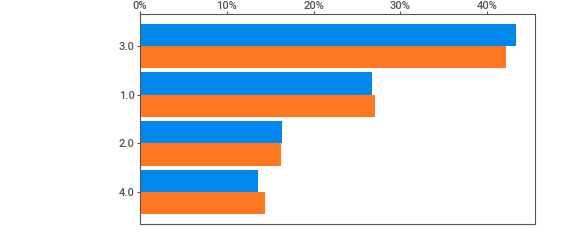
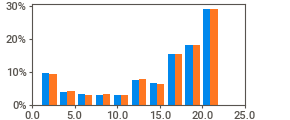
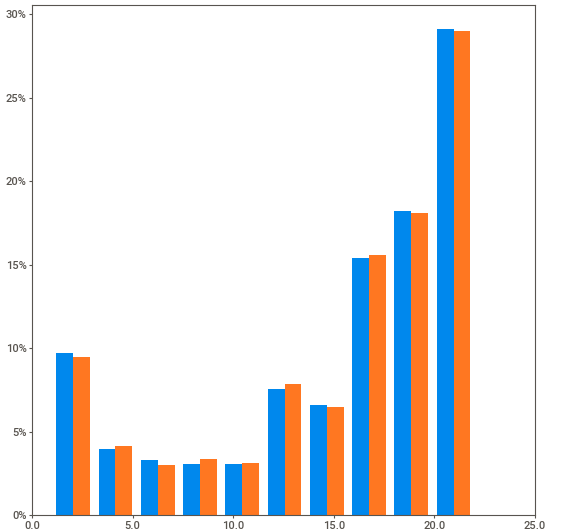
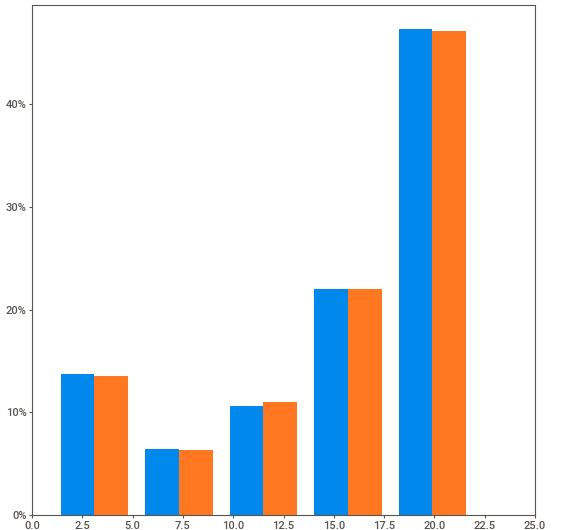
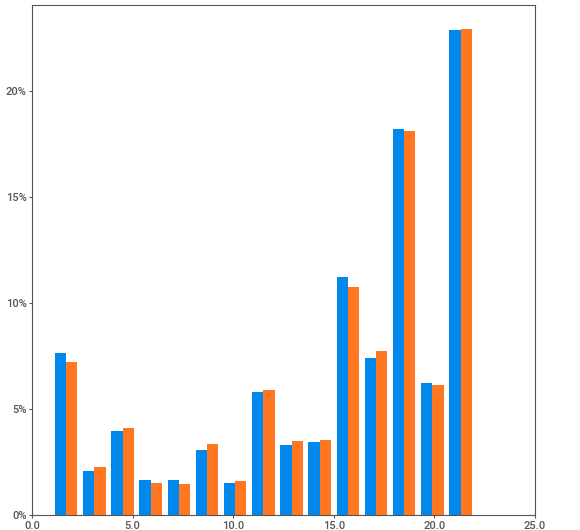
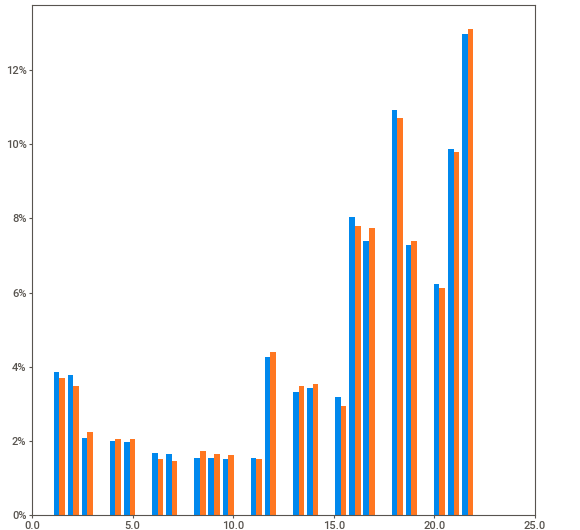
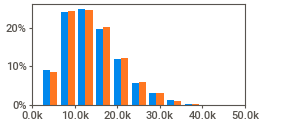
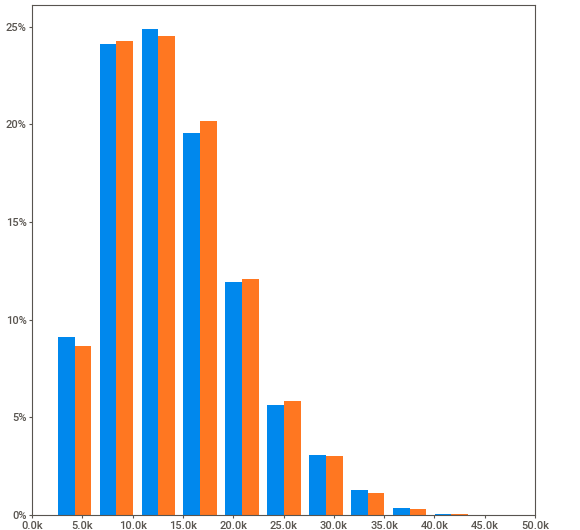
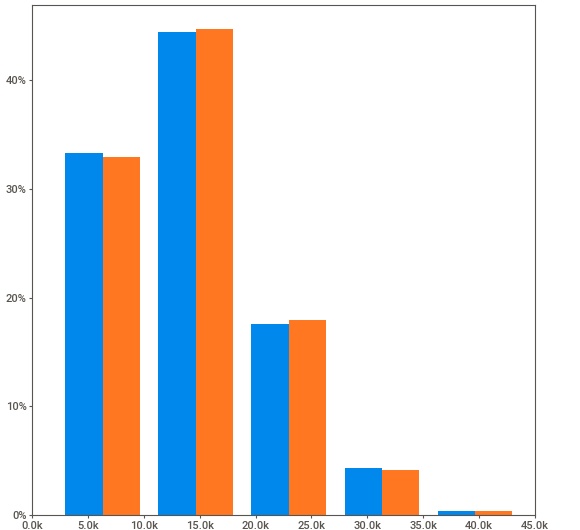
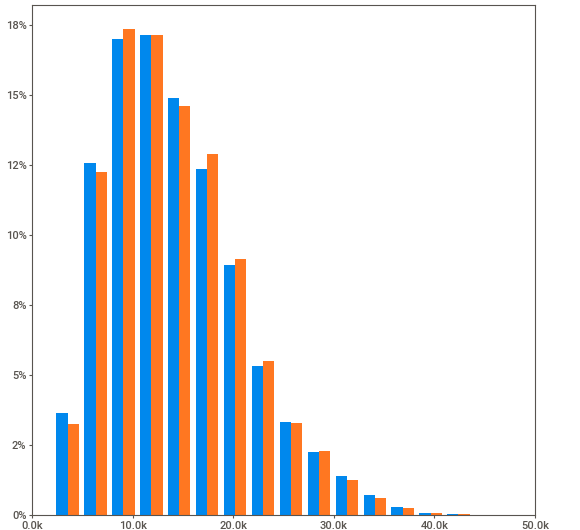
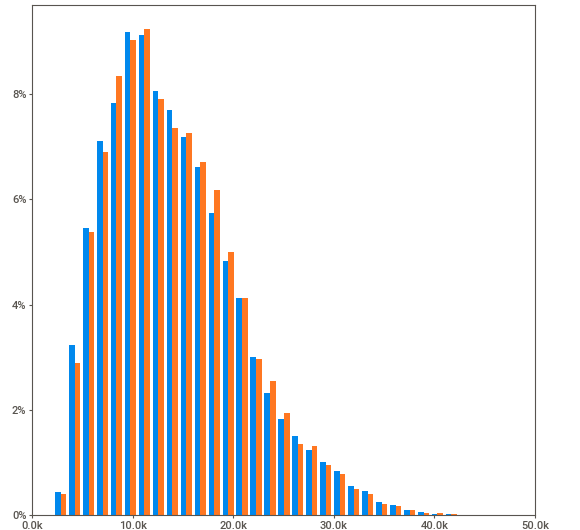
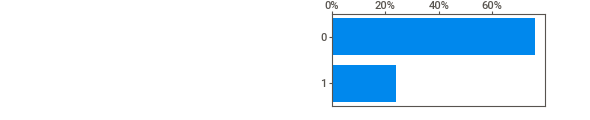
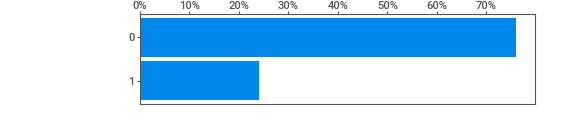
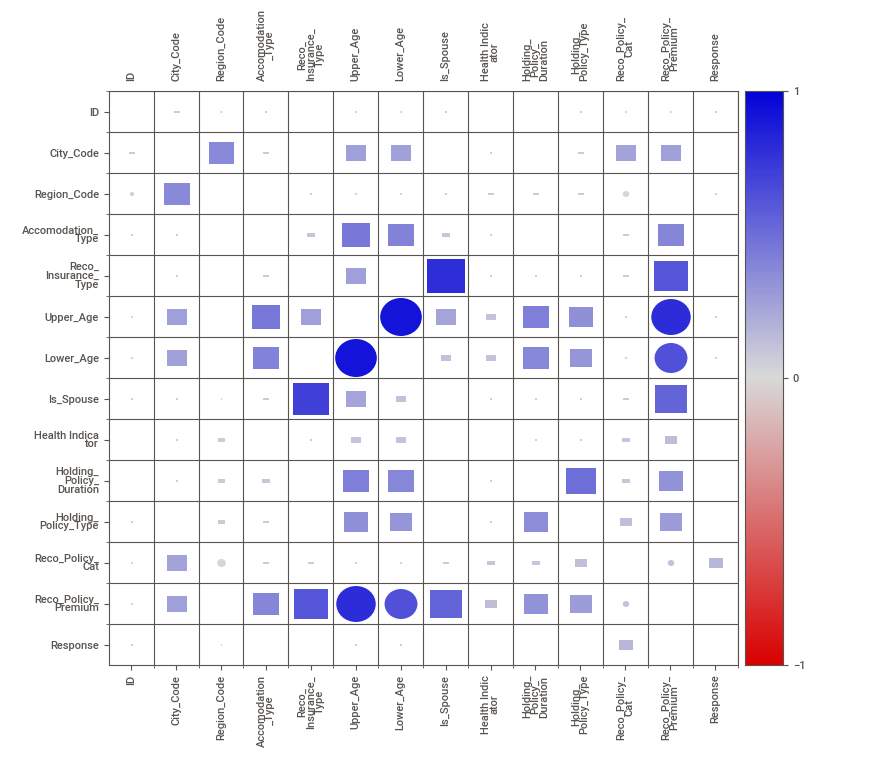
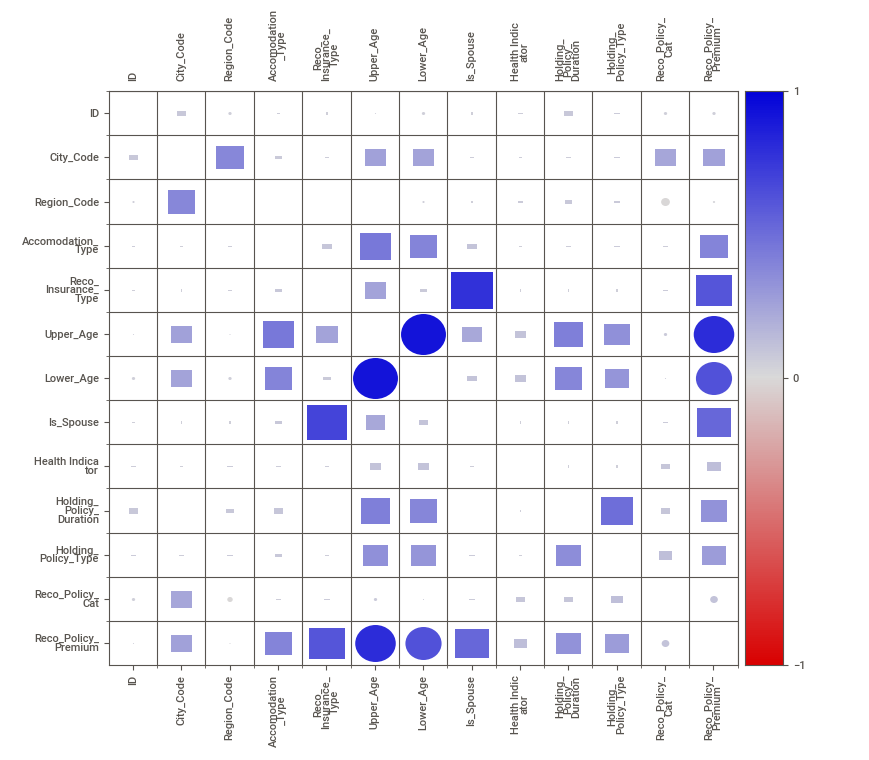

In [62]:
comparedf=sv.compare(train, test)
comparedf.show_notebook()

In [63]:
train.shape,test.shape

((50882, 14), (21805, 13))

In [64]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()


Shape of your Data Set: (50882, 14)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  4
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  3
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  1
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    14 Predictors classified...
        This does not include the Target column(s)
        2 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 3


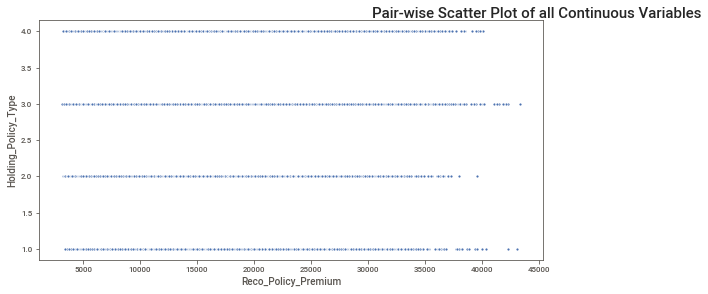

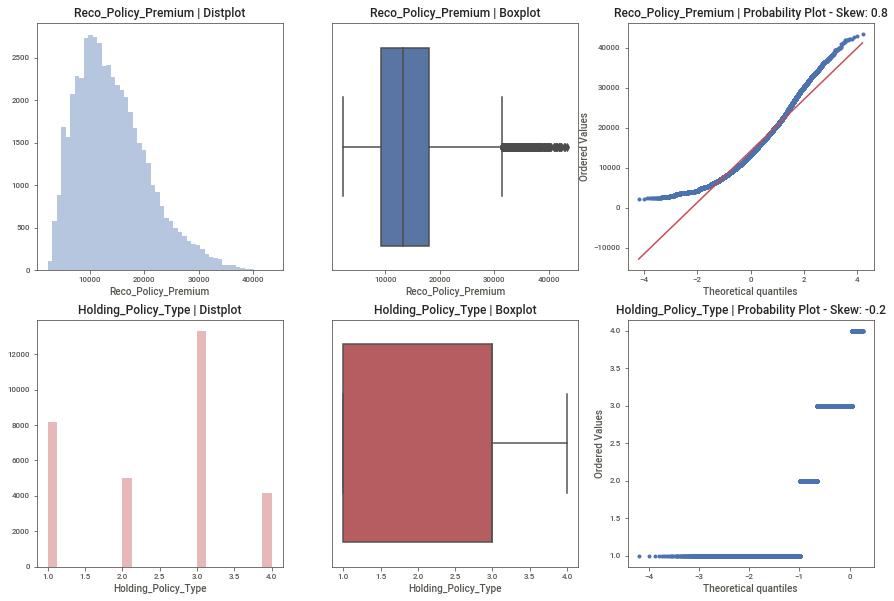

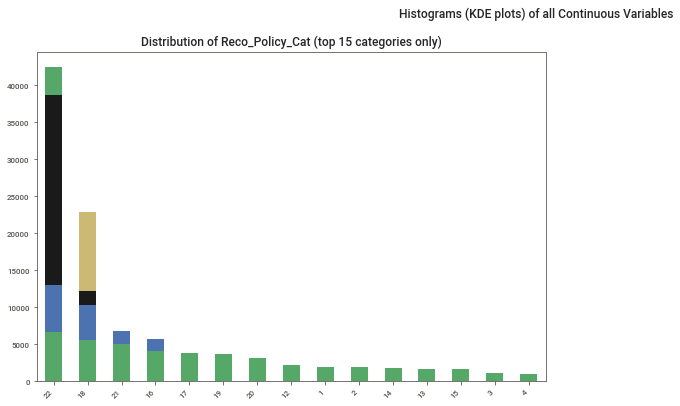

Could not draw Violin Plot


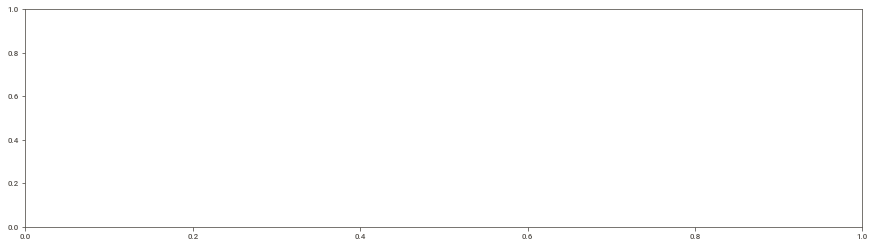

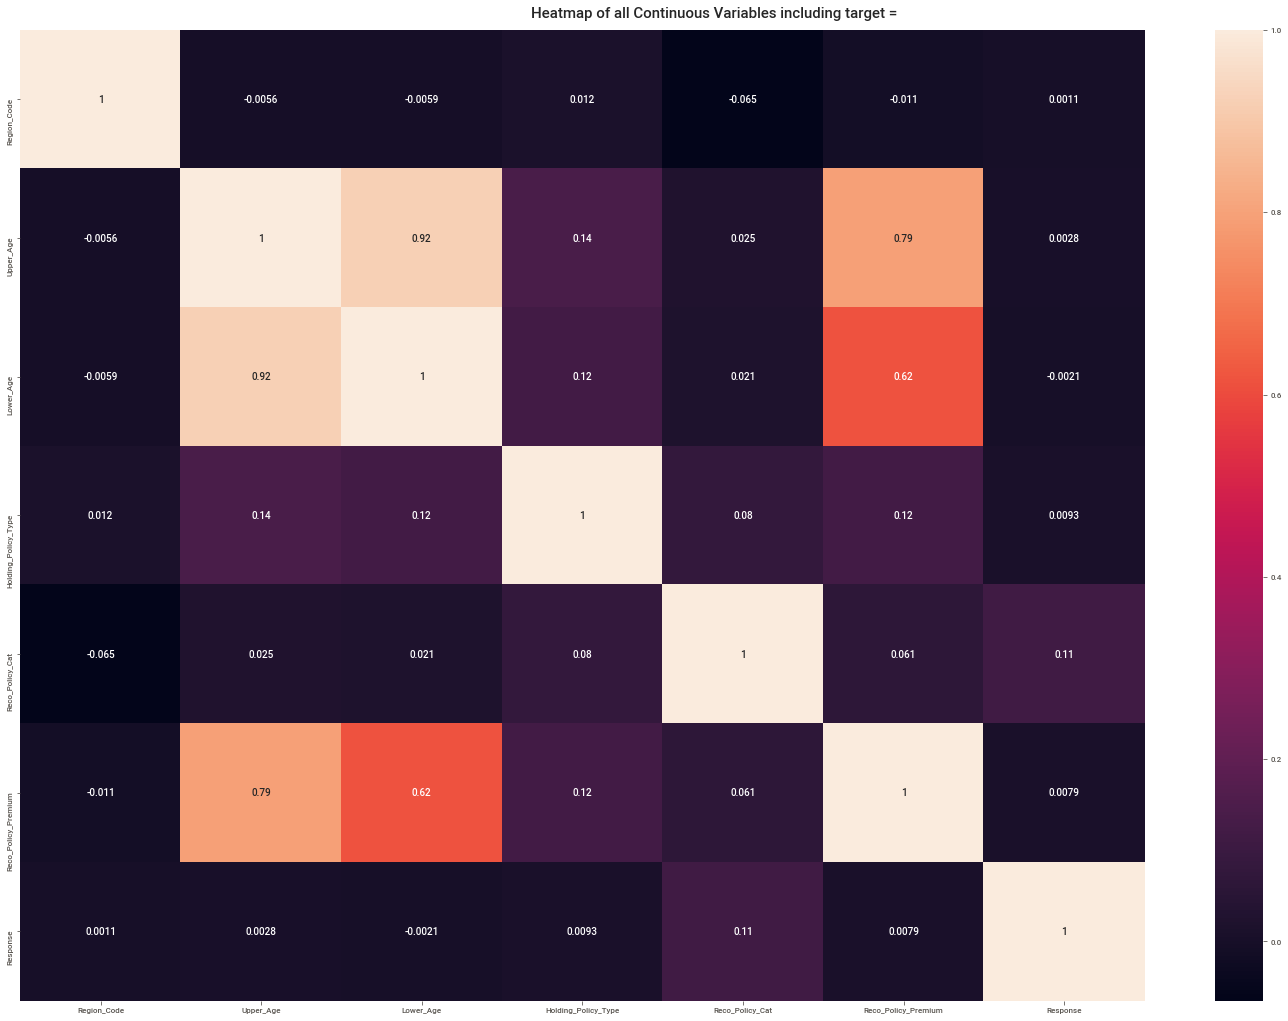

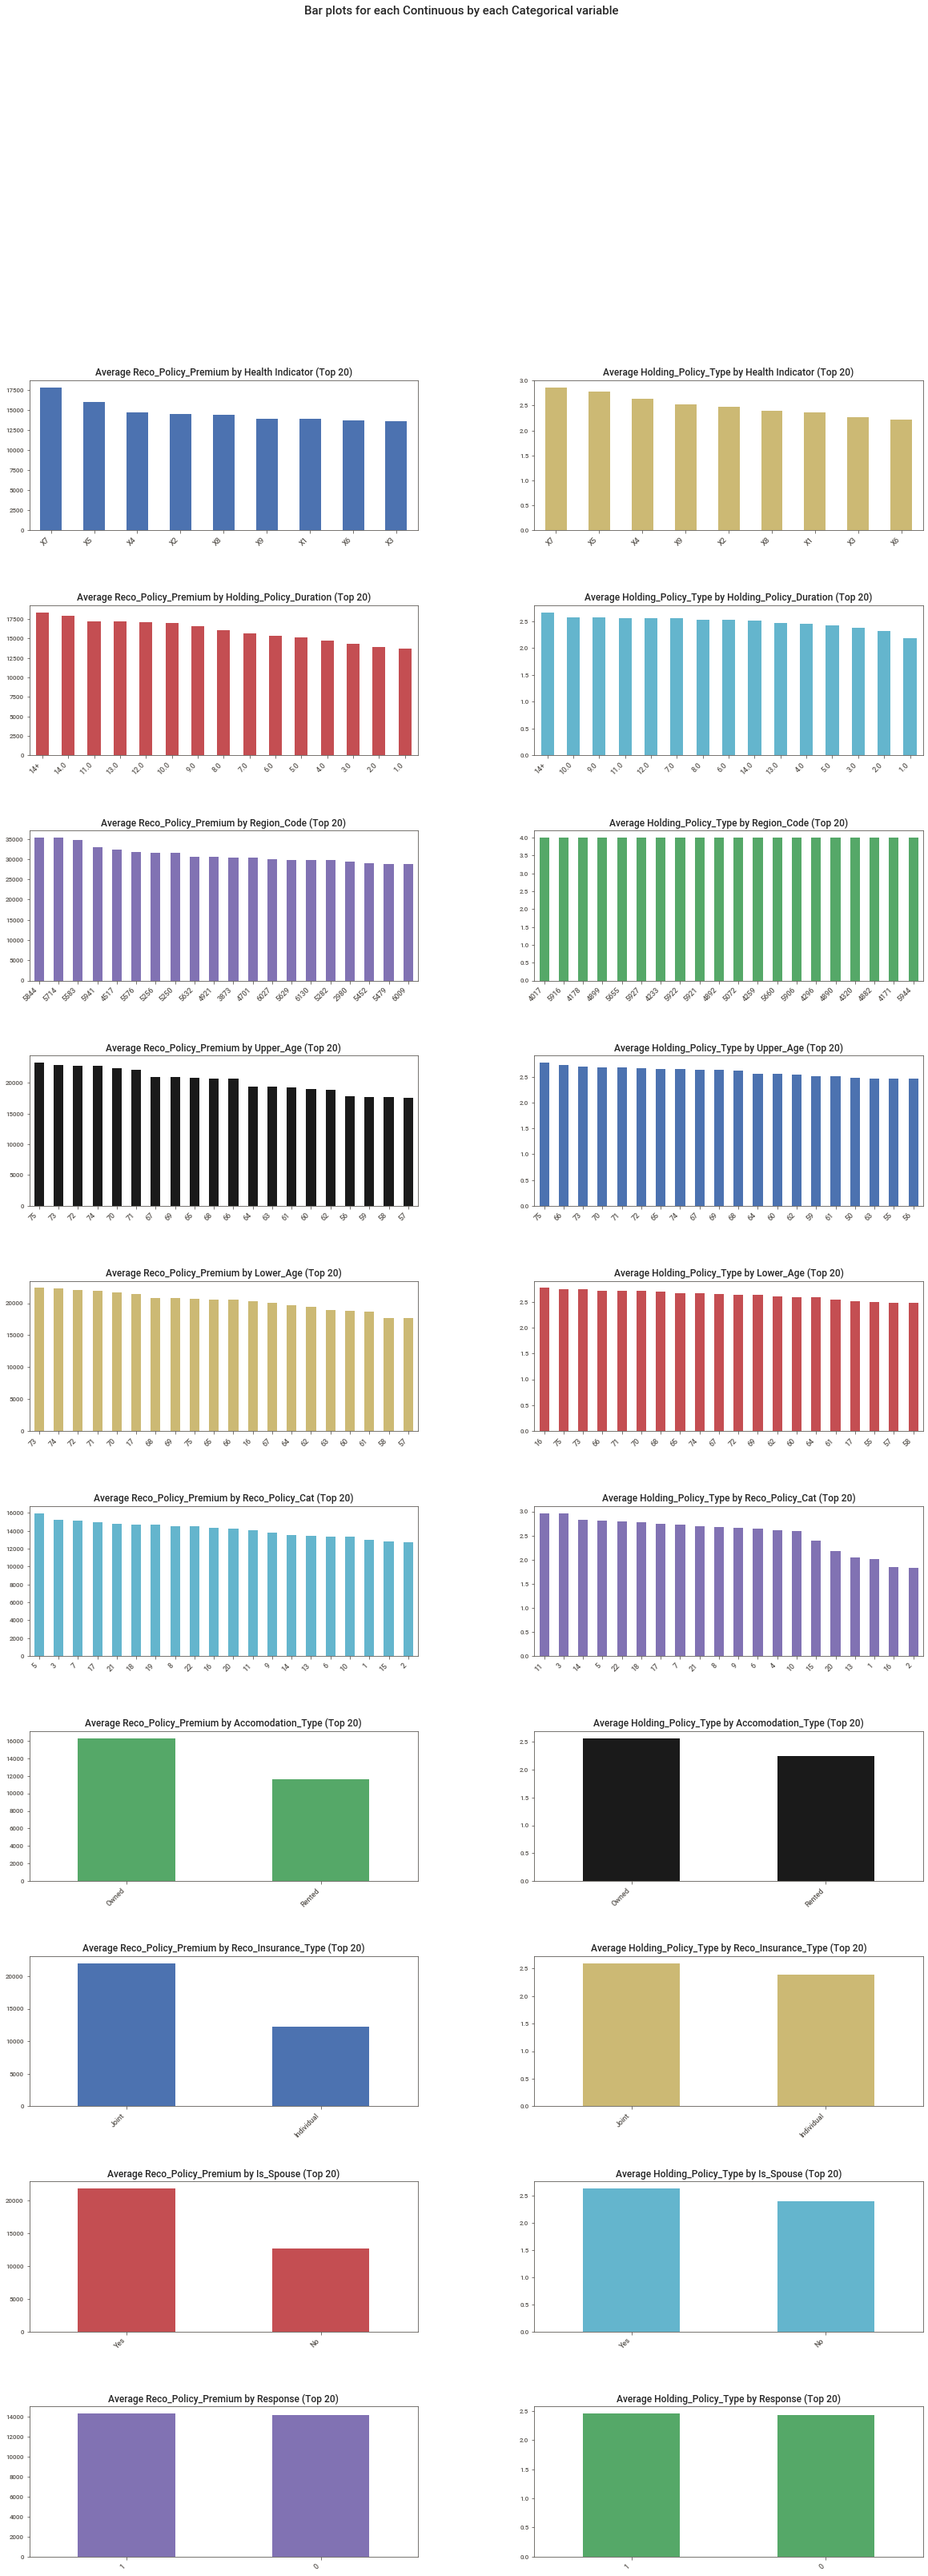

Time to run AutoViz (in seconds) = 5.654

 ###################### VISUALIZATION Completed ########################


In [65]:
df=AV.AutoViz('train.csv')

Shape of your Data Set: (50882, 14)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  4
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  3
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  1
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    13 Predictors classified...
        This does not include the Target column(s)
        2 variables removed since they were ID or low-information variables

################ Binary_Classification VISUALIZATION Started #####################


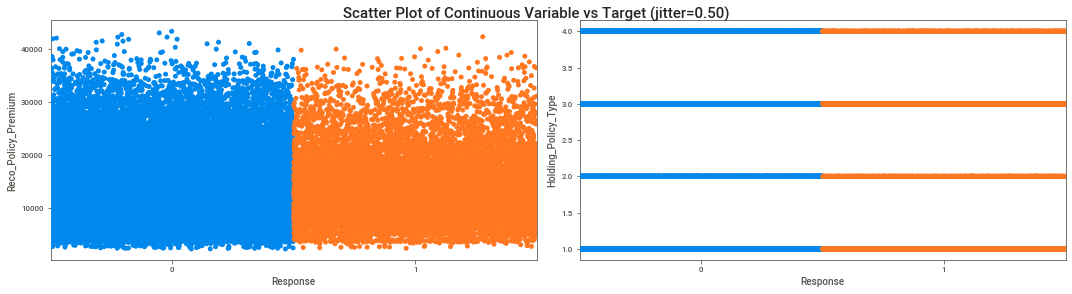

Total Number of Scatter Plots = 3


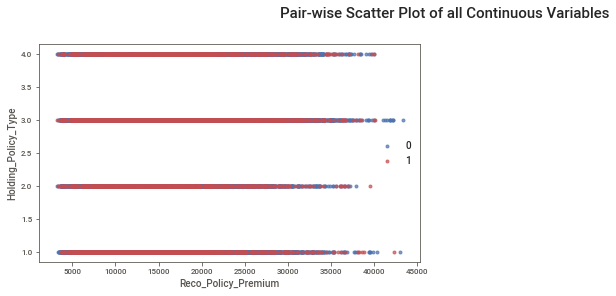

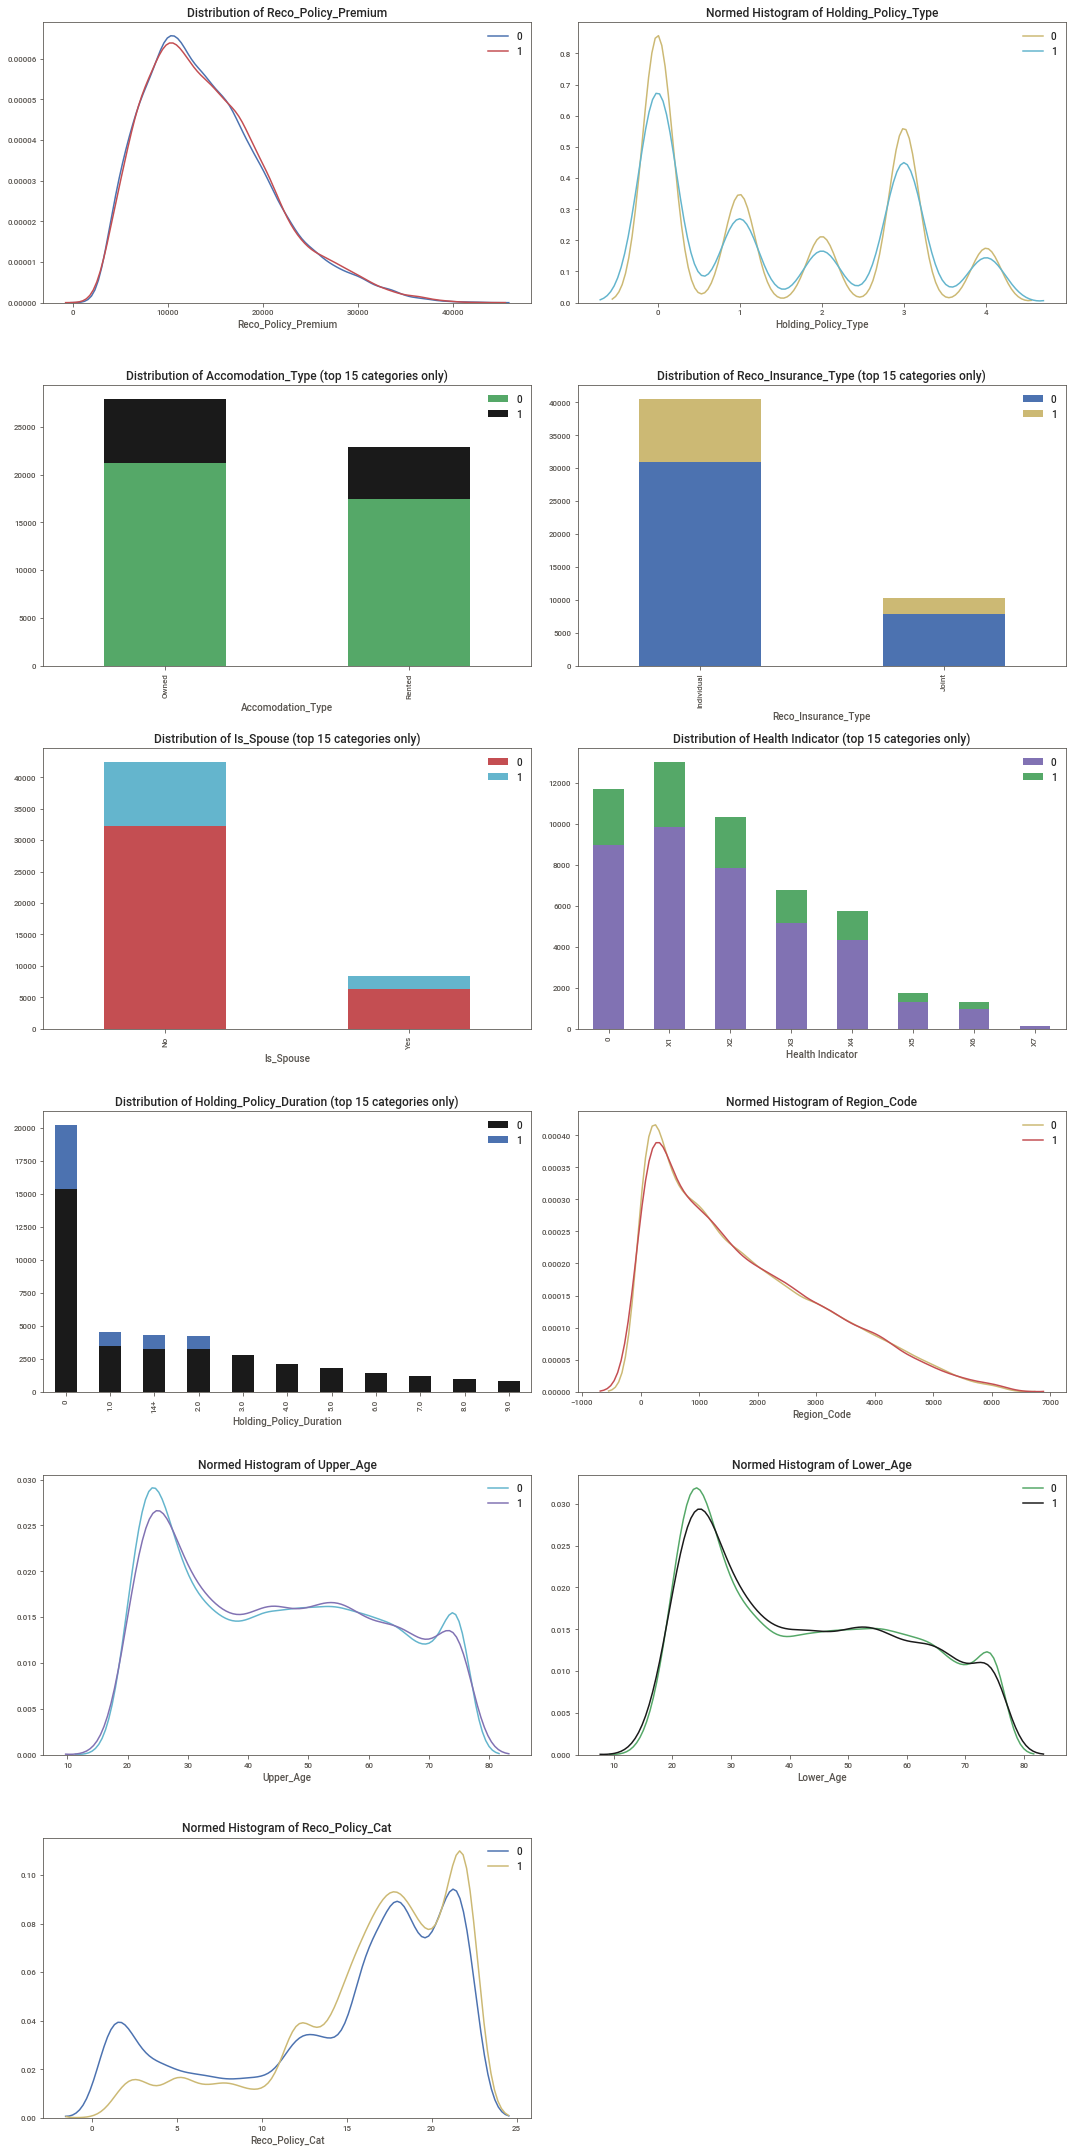

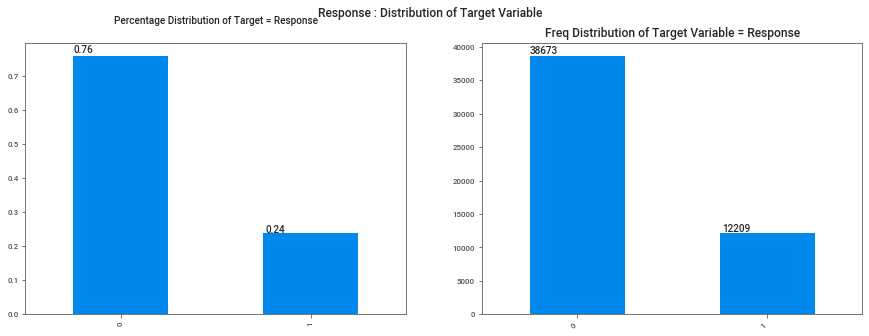

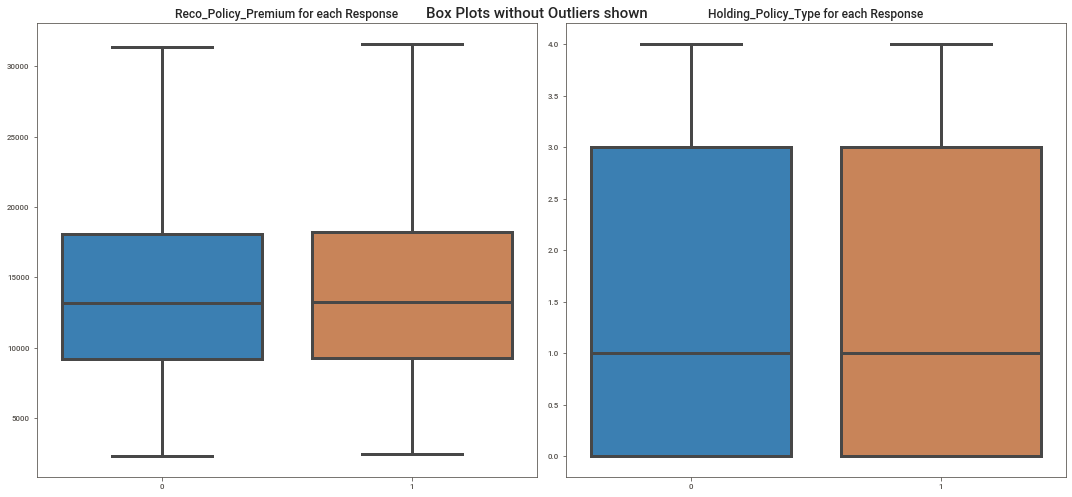

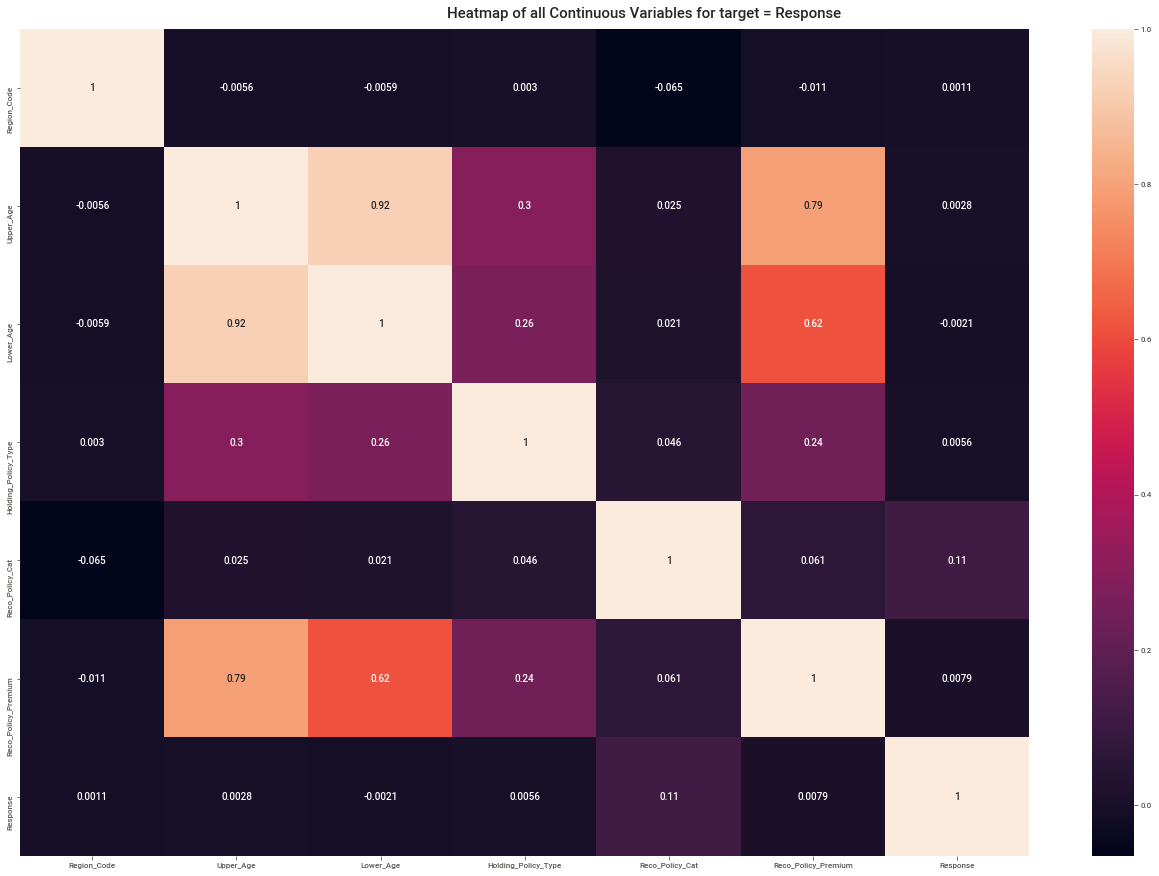

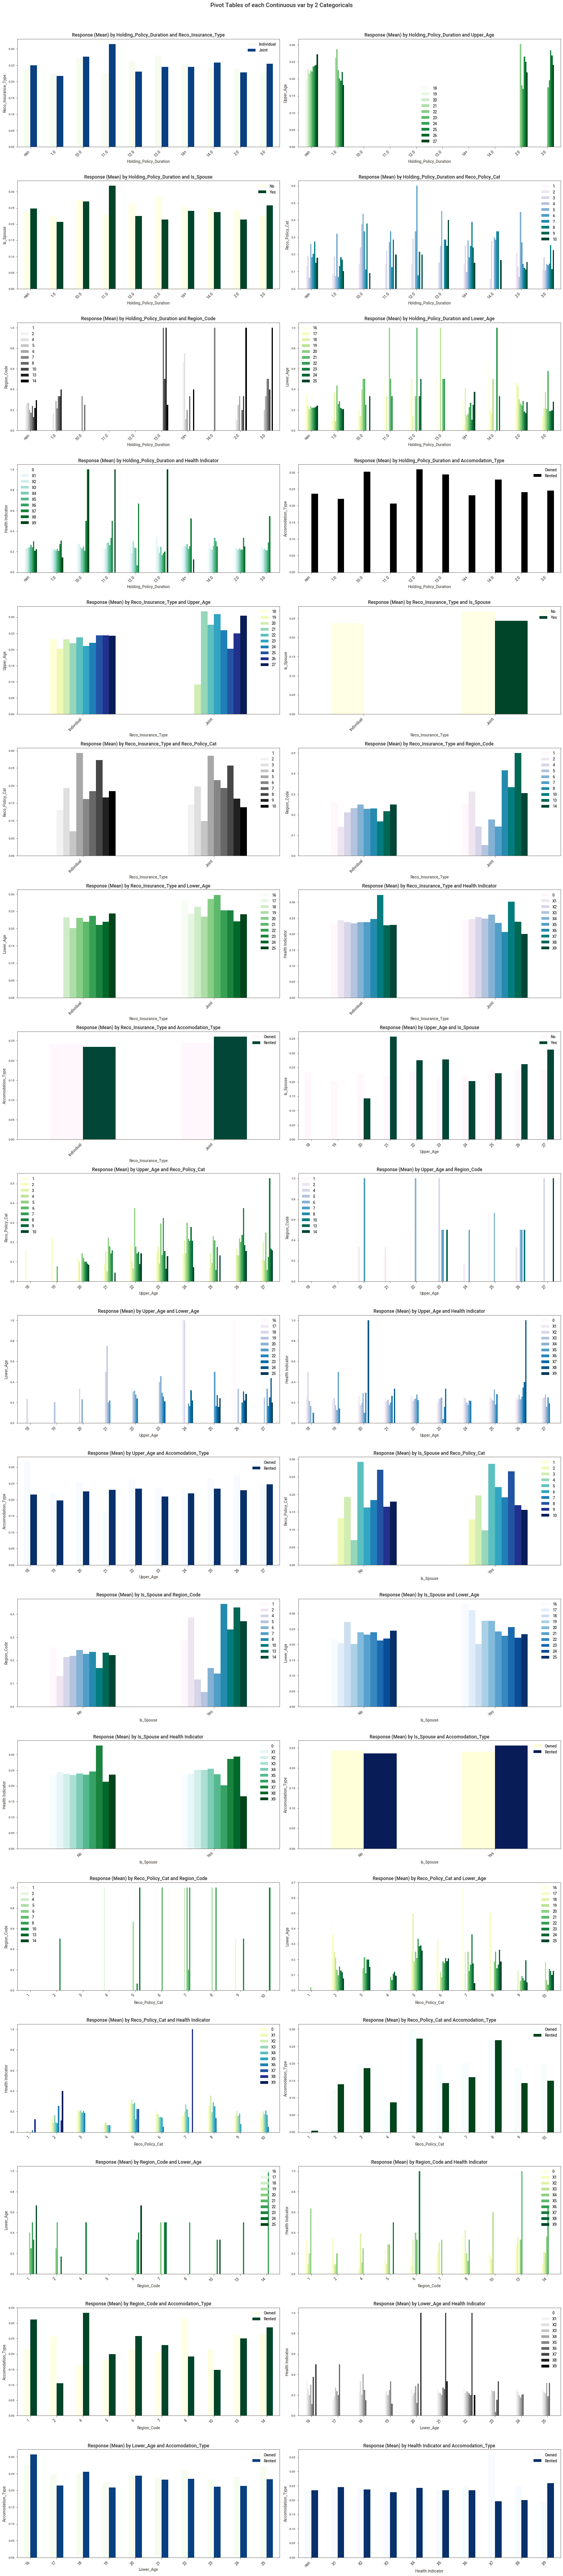

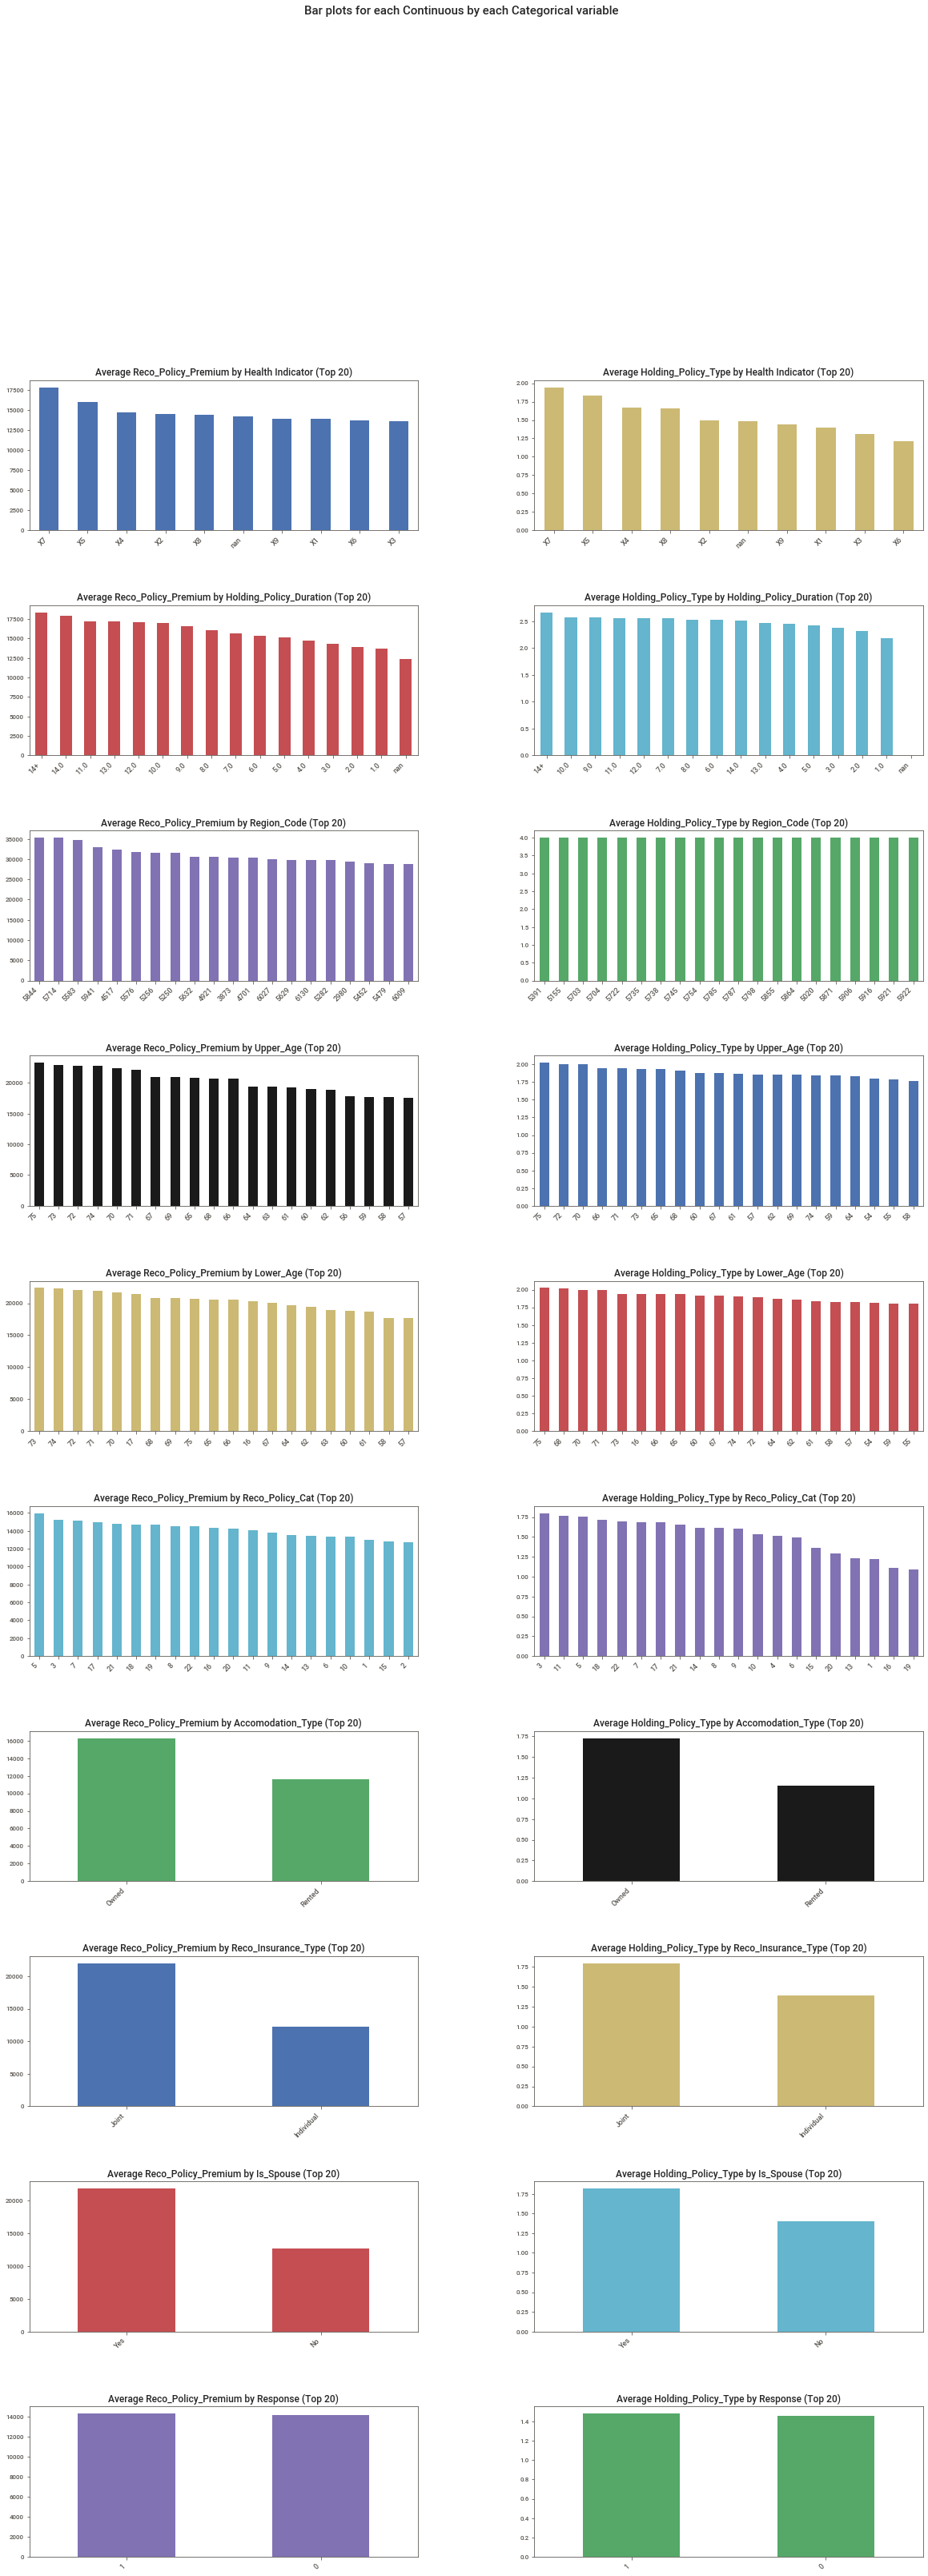

Time to run AutoViz (in seconds) = 23.692

 ###################### VISUALIZATION Completed ########################


In [66]:
df = AV.AutoViz('train.csv', depVar='Response')

#Impute missing values with 'Missing attribute'

In [67]:
train.fillna('-999',inplace=True)
test.fillna('-999',inplace=True)

# For holding policy duration other than 0,1,14+,2  there are no positive classes
Creating a variable which will act as an identifier to distinguish betweern unique classes and non-unique classes

In [68]:
policyduration_both_classes=['0','1','14+','2']
train['uniqueclass_policyduration']=train['Holding_Policy_Duration'].apply(lambda x: True if x in policyduration_both_classes else False)
test['uniqueclass_policyduration']=test['Holding_Policy_Duration'].apply(lambda x: True if x in policyduration_both_classes else False)

# Checking if the city code is same in both the data set

In [69]:
traincitycode=list(train.City_Code.unique())
testcitycode=list(test.City_Code.unique())
set(traincitycode).difference(testcitycode),set(testcitycode).difference(traincitycode)

(set(), set())

# Checking if the region code is same in both the data set

In [70]:
trainregioncode=list(train.Region_Code.unique())
testregioncode=list(test.Region_Code.unique())


In [71]:
for i in set(trainregioncode).difference(testregioncode):
    print('Count of '+str(i)+' region code is '+str(train[train['Region_Code']==i].shape[0]))

Count of 4098 region code is 5
Count of 4103 region code is 6
Count of 4121 region code is 7
Count of 4138 region code is 7
Count of 4140 region code is 7
Count of 4155 region code is 6
Count of 4191 region code is 7
Count of 4193 region code is 7
Count of 4223 region code is 5
Count of 4251 region code is 7
Count of 4254 region code is 7
Count of 4276 region code is 4
Count of 4280 region code is 5
Count of 4288 region code is 4
Count of 4292 region code is 6
Count of 4293 region code is 6
Count of 4300 region code is 6
Count of 4323 region code is 6
Count of 4325 region code is 5
Count of 4330 region code is 6
Count of 4333 region code is 5
Count of 4335 region code is 6
Count of 4355 region code is 5
Count of 4372 region code is 4
Count of 4378 region code is 5
Count of 4393 region code is 6
Count of 4404 region code is 4
Count of 4407 region code is 5
Count of 4418 region code is 6
Count of 4419 region code is 6
Count of 4421 region code is 6
Count of 4428 region code is 6
Count of

Count of 5364 region code is 2
Count of 5365 region code is 1
Count of 5368 region code is 1
Count of 5369 region code is 1
Count of 5370 region code is 1
Count of 5371 region code is 1
Count of 5372 region code is 2
Count of 5374 region code is 2
Count of 5376 region code is 2
Count of 5382 region code is 2
Count of 5383 region code is 2
Count of 5384 region code is 2
Count of 5387 region code is 2
Count of 5392 region code is 2
Count of 5396 region code is 2
Count of 5398 region code is 2
Count of 5399 region code is 2
Count of 5400 region code is 2
Count of 5403 region code is 2
Count of 5406 region code is 2
Count of 5409 region code is 2
Count of 5410 region code is 2
Count of 5413 region code is 1
Count of 5415 region code is 2
Count of 5417 region code is 2
Count of 5425 region code is 2
Count of 5432 region code is 2
Count of 5440 region code is 2
Count of 5441 region code is 1
Count of 5446 region code is 1
Count of 5449 region code is 2
Count of 5456 region code is 2
Count of

Count of 6017 region code is 1
Count of 6018 region code is 1
Count of 6019 region code is 1
Count of 6020 region code is 1
Count of 6023 region code is 1
Count of 6024 region code is 1
Count of 6026 region code is 1
Count of 6027 region code is 1
Count of 6028 region code is 1
Count of 6029 region code is 1
Count of 6030 region code is 1
Count of 6031 region code is 1
Count of 6032 region code is 1
Count of 6033 region code is 1
Count of 6034 region code is 1
Count of 6035 region code is 1
Count of 6041 region code is 1
Count of 6042 region code is 1
Count of 6044 region code is 1
Count of 6049 region code is 1
Count of 6052 region code is 1
Count of 6053 region code is 1
Count of 6054 region code is 1
Count of 6055 region code is 1
Count of 6058 region code is 1
Count of 6059 region code is 1
Count of 6060 region code is 1
Count of 6063 region code is 1
Count of 6064 region code is 1
Count of 6066 region code is 1
Count of 6067 region code is 1
Count of 6070 region code is 1
Count of

In [72]:
for i in set(testregioncode).difference(trainregioncode):
    print('Count of '+str(i)+' region code is '+str(test[test['Region_Code']==i].shape[0]))


Count of 6144 region code is 1
Count of 6156 region code is 1
Count of 6157 region code is 1
Count of 5141 region code is 2
Count of 6167 region code is 1
Count of 6170 region code is 1
Count of 6171 region code is 1
Count of 6180 region code is 1
Count of 6184 region code is 1
Count of 6185 region code is 1
Count of 5185 region code is 2
Count of 5205 region code is 3
Count of 5207 region code is 1
Count of 5211 region code is 2
Count of 5214 region code is 3
Count of 5232 region code is 3
Count of 5257 region code is 2
Count of 5273 region code is 2
Count of 5283 region code is 2
Count of 5287 region code is 1
Count of 5291 region code is 2
Count of 5298 region code is 1
Count of 5301 region code is 2
Count of 5305 region code is 2
Count of 5320 region code is 2
Count of 5338 region code is 2
Count of 5339 region code is 2
Count of 5350 region code is 2
Count of 5357 region code is 1
Count of 5359 region code is 2
Count of 5377 region code is 2
Count of 5385 region code is 1
Count of

It seems that the frequecy of the region codes which are not present in both the set is very less

In [73]:
#Storing the regioncode which are not present in both the data 

In [74]:
lessfrequentregion=set(trainregioncode).difference(testregioncode).union(set(testregioncode).difference(trainregioncode))
lessfrequentregion

{6144,
 4098,
 6146,
 6147,
 6148,
 6149,
 4103,
 6151,
 6152,
 6153,
 6154,
 6155,
 6156,
 6158,
 6157,
 6160,
 6161,
 6162,
 6163,
 6164,
 6165,
 6166,
 6167,
 6168,
 4121,
 6169,
 6170,
 6172,
 6173,
 6174,
 6175,
 6176,
 6177,
 6178,
 6179,
 6171,
 6181,
 6182,
 6183,
 6180,
 6184,
 4138,
 6187,
 4140,
 6188,
 6189,
 6191,
 6185,
 6193,
 6194,
 4155,
 4191,
 4193,
 6025,
 4223,
 4251,
 4254,
 2217,
 6141,
 4276,
 4280,
 4288,
 4292,
 4293,
 4300,
 4323,
 4325,
 4330,
 4333,
 4335,
 4355,
 4372,
 4378,
 4393,
 4404,
 4407,
 4418,
 4419,
 4421,
 4428,
 4441,
 4446,
 4449,
 4451,
 4459,
 2415,
 4469,
 4474,
 4479,
 4488,
 4494,
 4495,
 4499,
 4503,
 4511,
 4531,
 4537,
 4540,
 4543,
 2500,
 4556,
 2512,
 4563,
 4565,
 4570,
 4574,
 4580,
 4581,
 4590,
 2544,
 4594,
 4597,
 4602,
 2557,
 4615,
 4622,
 4629,
 4630,
 2590,
 4640,
 4649,
 4656,
 4662,
 4674,
 4682,
 4695,
 4696,
 4697,
 4698,
 4699,
 4706,
 4711,
 4712,
 4719,
 4721,
 4722,
 4726,
 4730,
 4732,
 4734,
 4739,
 4762,
 4766,

In [75]:
# Holding_Policy_Duration feature is ordinal but because of one value it has become categorical. So let's change it...
train['Holding_Policy_Duration'] = train['Holding_Policy_Duration'].replace({'14+':'15'})
test['Holding_Policy_Duration'] = test['Holding_Policy_Duration'].replace({'14+':'15'})

# It has some null values so let's fill null values with -1 so keep its ordinality..
train['Holding_Policy_Duration'].fillna(-1,inplace=True)
test['Holding_Policy_Duration'].fillna(-1,inplace=True)

# Convert it into float so that we need not to do any ordinal encoding...
train['Holding_Policy_Duration'] = train['Holding_Policy_Duration'].astype(float)
test['Holding_Policy_Duration'] = test['Holding_Policy_Duration'].astype(float)

# Converting datatypes to string 

In [76]:
train['Holding_Policy_Type'] = train['Holding_Policy_Type'].astype(str)
test['Holding_Policy_Type'] = test['Holding_Policy_Type'].astype(str)

train['Reco_Policy_Cat'] = train['Reco_Policy_Cat'].astype(str)
test['Reco_Policy_Cat'] = test['Reco_Policy_Cat'].astype(str)

train['Region_Code'] = train['Region_Code'].astype(str)
test['Region_Code'] = test['Region_Code'].astype(str)

# Renaming the less frequent region code to others

In [77]:
train['Region_Code']=train['Region_Code'].apply(lambda x:'LessFrequentRegion' if int(x) in lessfrequentregion else x)
test['Region_Code']=test['Region_Code'].apply(lambda x:'LessFrequentRegion' if int(x) in lessfrequentregion else x)    

# Preprocessing

# Label Encoding

In [78]:
cat_columns = []
for col in train.select_dtypes('object').columns:
    print(col)
    cat_columns.append(col)
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    test[col]=le.fit_transform(test[col])

City_Code
Region_Code
Accomodation_Type
Reco_Insurance_Type
Is_Spouse
Health Indicator
Holding_Policy_Type
Reco_Policy_Cat


# Feature Engineering

In [101]:
def frequency_encoding(column_name,output_column_name,df):
    fe_pol = (df.groupby(column_name).size()) / len(df)
    df[output_column_name] = df[column_name].apply(lambda x : fe_pol[x])

In [102]:
def feature_engineering(df):
    le = LabelEncoder()
    
     #Interaction Feature (Combining 2 categorical features and performing frequency encoding)
        
    cat_features=[]
    le_features=[]
    columns=['City_Code','Accomodation_Type','Reco_Insurance_Type','Health Indicator','Is_Spouse','Region_Code','Holding_Policy_Type','Reco_Policy_Cat']

    comb = combinations(columns, 2) 

    for i in list(comb):  
        df[f'{i[0]}_{i[1]}']=df[i[0]].astype(str)+'_'+df[i[1]].astype(str)
        df[f'{i[0]}_{i[1]}_le']=le.fit_transform(df[f'{i[0]}_{i[1]}'])
        le_features.append(f'{i[0]}_{i[1]}_le')
        frequency_encoding(f'{i[0]}_{i[1]}',f'{i[0]}_{i[1]}',df)
        cat_features.append(f'{i[0]}_{i[1]}')   
        
    #Frequency Encoding
    
    frequency_encoding('Region_Code','Region_Code_fe',df)
    frequency_encoding('Reco_Policy_Cat','Reco_Policy_Cat_fe',df)
    
    #Deriving characteristics of each city by creating aggregate features
    
    city_aggregate_features = df.groupby(['City_Code']).agg({'Lower_Age': ['mean', 'max', 'min','std'],
                                                     'Reco_Policy_Premium': ['mean', 'max', 'min','std'], 
                                                     'Region_Code': ['nunique','count'], 
                                                     'Accomodation_Type': ['nunique','count'],
                                                     'Reco_Insurance_Type': ['nunique','count'] ,
                                                     'Health Indicator': ['nunique','count'] ,
                                                     'Holding_Policy_Type': ['nunique','count'] ,
                                                     'Reco_Policy_Cat': ['nunique','count'] ,
                                                     })
    city_aggregate_features.columns = ['city_aggregate_features' + '_'.join(c).strip('_') for c in city_aggregate_features.columns]
    df = pd.merge(df, city_aggregate_features, on = ['City_Code'], how='left')

 
    city_region_aggregate_features = df.groupby(['City_Code','Region_Code']).agg({'Lower_Age': ['mean', 'max', 'min','std'],
                                                     'Reco_Policy_Premium': ['mean', 'max', 'min','std'],  
                                                     'Accomodation_Type': ['nunique','count'],
                                                     'Reco_Insurance_Type': ['nunique','count'] ,
                                                     'Health Indicator': ['nunique','count'] ,
                                                     'Holding_Policy_Type': ['nunique','count'] ,
                                                     'Reco_Policy_Cat': ['nunique','count'] ,
                                                     })
    city_region_aggregate_features.columns = ['city_region_aggregate_features' + '_'.join(c).strip('_') for c in city_region_aggregate_features.columns]
    df = pd.merge(df, city_region_aggregate_features, on = ['City_Code','Region_Code'], how='left')

    city_recopolicycat_aggregate_features = df.groupby(['City_Code','Reco_Policy_Cat']).agg({'Lower_Age': ['mean', 'max', 'min','std'],
                                                     'Reco_Policy_Premium': ['mean', 'max', 'min','std'], 
                                                     'Region_Code': ['nunique','count'], 
                                                     'Accomodation_Type': ['nunique','count'],
                                                     'Reco_Insurance_Type': ['nunique','count'] ,
                                                     'Health Indicator': ['nunique','count'] ,
                                                     'Holding_Policy_Type': ['nunique','count'] 
                                                     })
    city_recopolicycat_aggregate_features.columns = ['city_recopolicycat_aggregate_features' + '_'.join(c).strip('_') for c in city_recopolicycat_aggregate_features.columns]
    df = pd.merge(df, city_recopolicycat_aggregate_features, on = ['City_Code','Reco_Policy_Cat'], how='left')
    
    city_regioncoderecopolicycat_aggregate_features = df.groupby(['City_Code','Region_Code_Reco_Policy_Cat']).agg({'Lower_Age': ['mean', 'max', 'min','std'],
                                                     'Reco_Policy_Premium': ['mean', 'max', 'min','std'], 
                                                     'Region_Code': ['nunique','count'], 
                                                     'Accomodation_Type': ['nunique','count'],
                                                     'Reco_Insurance_Type': ['nunique','count'] ,
                                                     'Health Indicator': ['nunique','count'] ,
                                                     'Holding_Policy_Type': ['nunique','count'] ,
                                                     'Reco_Policy_Cat': ['nunique','count'] ,
                                                     })

    city_regioncoderecopolicycat_aggregate_features.columns = ['city_regioncoderecopolicycat_aggregate_features' + '_'.join(c).strip('_') for c in city_regioncoderecopolicycat_aggregate_features.columns]
    df = pd.merge(df, city_regioncoderecopolicycat_aggregate_features, on = ['City_Code','Region_Code_Reco_Policy_Cat'], how='left')
    
    for i in cat_features:
        df[f'city_{i}_max']=df.groupby('City_Code')[i].transform('max')
        df[f'city_{i}_min']=df.groupby('City_Code')[i].transform('min')
        df[f'city_{i}_mean']=df.groupby('City_Code')[i].transform('mean')
        df[f'city_{i}_std']=df.groupby('City_Code')[i].transform('std')

    
        df[f'city_region_{i}_max']=df.groupby(['City_Code','Region_Code'])[i].transform('max')
        df[f'city_region_{i}_min']=df.groupby(['City_Code','Region_Code'])[i].transform('min')
        df[f'city_region_{i}_mean']=df.groupby(['City_Code','Region_Code'])[i].transform('mean')
        df[f'city_region_{i}_std']=df.groupby(['City_Code','Region_Code'])[i].transform('std')

    
        df[f'city_recopolicycat_{i}_max']=df.groupby(['City_Code','Reco_Policy_Cat'])[i].transform('max')
        df[f'city_recopolicycat_{i}_min']=df.groupby(['City_Code','Reco_Policy_Cat'])[i].transform('min')
        df[f'city_recopolicycat_{i}_mean']=df.groupby(['City_Code','Reco_Policy_Cat'])[i].transform('mean')
        df[f'city_recopolicycat_{i}_std']=df.groupby(['City_Code','Reco_Policy_Cat'])[i].transform('std')
        
    
    #features on reco_policy_cat
    
    recopolicycat_aggregate_features = df.groupby(['Reco_Policy_Cat']).agg({'Lower_Age': ['mean', 'max', 'min','std'],
                                                     'Reco_Policy_Premium': ['mean', 'max', 'min','std','sum'],   
                                                     'Region_Code': ['nunique','count'], 
                                                     'Accomodation_Type': ['nunique'],
                                                     'Reco_Insurance_Type': ['nunique'] ,
                                                     'Health Indicator': ['nunique','count'] ,
                                                     'Holding_Policy_Type': ['nunique','count'] ,
                                                     'City_Code': ['nunique','count'] ,
                                                     })
    recopolicycat_aggregate_features.columns = ['recopolicycat_aggregate_features' + '_'.join(c).strip('_') for c in recopolicycat_aggregate_features.columns]
    df = pd.merge(df, recopolicycat_aggregate_features, on = ['Reco_Policy_Cat'], how='left')
        
        

    #features on Holding_Policy_Type 
    
    holdingpolicytype_aggregate_features = df.groupby(['Holding_Policy_Type']).agg({'Lower_Age': ['mean', 'max', 'min','std'],
                                                     'Reco_Policy_Premium': ['mean', 'max', 'min','std'], 
                                                     'Region_Code': ['nunique','count'], 
                                                     'Accomodation_Type': ['nunique','count'],
                                                     'Reco_Insurance_Type': ['nunique','count'] ,
                                                     'Health Indicator': ['nunique','count'] ,
                                                     'City_Code': ['nunique','count'] ,
                                                     })
    holdingpolicytype_aggregate_features.columns = ['holdingpolicytype_aggregate_features' + '_'.join(c).strip('_') for c in holdingpolicytype_aggregate_features.columns]
    df = pd.merge(df, holdingpolicytype_aggregate_features, on = ['Holding_Policy_Type'], how='left')
    
    #Deriving characteristics of Accomodation_Type by creating aggregate features
    
    Accomodation_Type_aggregate_features = df.groupby(['Accomodation_Type']).agg({'Lower_Age': ['mean', 'max', 'min','std'],
                                                     'Reco_Policy_Premium': ['mean', 'max', 'min','std','sum'],   
                                                     'Region_Code': ['nunique','count'], 
                                                     'Reco_Insurance_Type': ['nunique'] ,
                                                     'Health Indicator': ['nunique','count'] ,
                                                     'Holding_Policy_Type': ['nunique','count'] ,
                                                     'City_Code': ['nunique','count'] ,
                                                     })
    Accomodation_Type_aggregate_features.columns = ['Accomodation_Type_aggregate_features' + '_'.join(c).strip('_') for c in Accomodation_Type_aggregate_features.columns]
    df = pd.merge(df, Accomodation_Type_aggregate_features, on = ['Accomodation_Type'], how='left')
    
    #Deriving characteristics of Interaction_features by creating aggregate features (These interaction feature are selected for aggregating based on its feature importance)
    
    Region_CodeReco_Policy_Cat_grpd = df.groupby(['Region_Code_Reco_Policy_Cat']).agg({ 'Reco_Policy_Premium': ['mean', 'max', 'min', 'std']})                                                              
                                                     
    Region_CodeReco_Policy_Cat_grpd.columns = ['grpd_by_Region_Code_Reco_Policy_Cat_' + '_'.join(c).strip('_') for c in Region_CodeReco_Policy_Cat_grpd.columns]
    df = pd.merge(df, Region_CodeReco_Policy_Cat_grpd, on = ['Region_Code_Reco_Policy_Cat'], how='left')


    City_CodeRegion_Code_grpd = df.groupby(['City_Code_Region_Code']).agg({ 'Reco_Policy_Premium': ['mean', 'max', 'min', 'std']})                                                              
                                                     
    City_CodeRegion_Code_grpd.columns = ['grpd_by_City_CodeRegion_Code_' + '_'.join(c).strip('_') for c in City_CodeRegion_Code_grpd.columns]
    df = pd.merge(df, City_CodeRegion_Code_grpd, on = ['City_Code_Region_Code'], how='left')


    City_CodeReco_Policy_Cat_grpd = df.groupby(['City_Code_Reco_Policy_Cat']).agg({ 'Reco_Policy_Premium': ['mean', 'max', 'min', 'std']})                                                              
                                                     
    City_CodeReco_Policy_Cat_grpd.columns = ['grpd_by_City_CodeReco_Policy_Cat_' + '_'.join(c).strip('_') for c in City_CodeReco_Policy_Cat_grpd.columns]
    df = pd.merge(df, City_CodeReco_Policy_Cat_grpd, on = ['City_Code_Reco_Policy_Cat'], how='left')


    Holding_Policy_TypeReco_Policy_Cat_grpd = df.groupby(['Holding_Policy_Type_Reco_Policy_Cat']).agg({ 'Reco_Policy_Premium': ['mean', 'max', 'min', 'std']})                                                              
                                                     
    Holding_Policy_TypeReco_Policy_Cat_grpd.columns = ['grpd_by_Holding_Policy_TypeReco_Policy_Cat_' + '_'.join(c).strip('_') for c in Holding_Policy_TypeReco_Policy_Cat_grpd.columns]
    df = pd.merge(df, Holding_Policy_TypeReco_Policy_Cat_grpd, on = ['Holding_Policy_Type_Reco_Policy_Cat'], how='left')
    
    return df,le_features

In [103]:
train,features=feature_engineering(train)

In [104]:
test,features=feature_engineering(test)

In [105]:
drop_columns_train={'ID','Response','Upper_Age'}
drop_columns_test={'ID','Upper_Age'}
    
target=['Response']

x=train.drop(columns=drop_columns_train,axis=1)
y=train[target]
x_test=test.drop(columns=drop_columns_test,axis=1)

In [106]:
err = [] 

oofs = np.zeros(shape=(len(x)))
preds = np.zeros(shape=(len(x_test)))

Folds=8

fold = StratifiedKFold(n_splits=Folds, shuffle=True, random_state=2020)
i = 1

for train_index, test_index in fold.split(x, y):
    x_train, x_val = x.iloc[train_index], x.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]

    m =  CatBoostClassifier(n_estimators=10000,random_state=2020,eval_metric='AUC')

    m.fit(x_train, y_train,eval_set=[(x_val, y_val)], early_stopping_rounds=30,verbose=100,cat_features=cat_features)

    pred_y = m.predict_proba(x_val)[:,1]
    oofs[test_index] = pred_y
    print(i, " err_cat: ", roc_auc_score(y_val,pred_y))
    err.append(roc_auc_score(y_val,pred_y))
    preds+= m.predict_proba(x_test)[:,1]
    i = i + 1
preds=preds/Folds

print(f"Average StratifiedKFold Score : {sum(err)/Folds} ")
oof_score = roc_auc_score(y, oofs)
print(f'\nOOF Auc is : {oof_score}')

oofs=pd.DataFrame(oofs,columns=['catboostoof'])
preds=pd.DataFrame(preds,columns=['catboostpred'])

oofs.to_csv('catboostoof.csv',index=False)
preds.to_csv('catboostpred.csv',index=False)

Learning rate set to 0.029724
0:	test: 0.7501712	best: 0.7501712 (0)	total: 303ms	remaining: 50m 29s
100:	test: 0.8013671	best: 0.8013671 (100)	total: 29.2s	remaining: 47m 43s
200:	test: 0.8052258	best: 0.8052258 (200)	total: 56.7s	remaining: 46m 4s
300:	test: 0.8066290	best: 0.8066370 (298)	total: 1m 23s	remaining: 44m 42s
400:	test: 0.8080633	best: 0.8080633 (400)	total: 1m 49s	remaining: 43m 49s
500:	test: 0.8090038	best: 0.8090038 (500)	total: 2m 16s	remaining: 43m 1s
Stopped by overfitting detector  (30 iterations wait)

bestTest = 0.8093457627
bestIteration = 546

Shrink model to first 547 iterations.
1  err_cat:  0.8093457627256475
Learning rate set to 0.029724
0:	test: 0.7589400	best: 0.7589400 (0)	total: 285ms	remaining: 47m 28s
100:	test: 0.8088615	best: 0.8088693 (99)	total: 28.7s	remaining: 46m 48s
200:	test: 0.8148804	best: 0.8148804 (200)	total: 56.1s	remaining: 45m 36s
300:	test: 0.8169738	best: 0.8169738 (300)	total: 1m 21s	remaining: 44m
400:	test: 0.8180373	best: 0.81